In [6]:
#extracting the bin edges and the bin sizes
import scipy.io
import pandas as pd

# Replace 'your_file.mat' with the path to your MATLAB file
matlab_file = '/home/mmp/Downloads/extendedMetrics 1.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(matlab_file)

# Display the keys in the MATLAB file
print("Keys in the MATLAB file:")
for key in mat_contents.keys():
    print(key)

# Inspect the contents of 'allExtMetrics'
if 'allExtMetrics' in mat_contents:
    allExtMetrics = mat_contents['allExtMetrics']
    print("allExtMetrics contents:")
    print(allExtMetrics)
else:
    print("Key 'allExtMetrics' not found in the MATLAB file")


Keys in the MATLAB file:
__header__
__version__
__globals__
allExtMetrics
allExtMetrics contents:
[[array([[array([[(array([[6]], dtype=uint8), array([[4]], dtype=uint8), array([[1]], dtype=uint8), array(['M06691'], dtype='<U6'), array(['1FHET'], dtype='<U5'), array([[ 1,  0,  0, ...,  0,  0, 66]], dtype=uint8), array([[1.91964666e-03, 1.92056419e-03, 1.92148215e-03, ...,
                          4.99522377e+03, 4.99761132e+03, 5.00000001e+03]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]))                                                                                                                                        ]],
                dtype=[('Run_ID', 'O'), ('DIV', 'O'), ('Well', 'O'), ('Chip_ID', 'O'), ('NeuronType', 'O'), ('networkAPFreqBins', 'O'), ('networkAPFreqEdges', 'O'), ('burstAPFreqBins', 'O'), ('burstAPFreqEdges', 'O'), ('nonburstAPFreqBins', 'O'), ('nonburstAPFreqEdges', 'O')])  ],
         [array([[(array([[6]], dtype=uint8), array([[4]], dtyp

In [35]:
allExtMetrics[0][1][0][0][0]['Chip_ID'][0][0]

'M06792'

In [ ]:
#Below is the code for plotting the graphs without normalization using the Bins and bin edges for the all the RUN_IDs for network frequency

In [48]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
# Load the MATLAB file
mat_file_path = '/home/mmp/Downloads/extendedMetrics 1.mat'
mat_data = scipy.io.loadmat(mat_file_path)



all_records = np.squeeze(mat_data['allExtMetrics'])
refined_results = []   
for idx, record in enumerate(all_records):
    try:
        if record.size > 0:
                for item in record:
                    #print(item[0][0][0])
                    if item.size > 0:
                        div = item[0][0][0]['DIV'][0][0]
                        well = item[0][0][0]['Well'][0][0]
                        Run_ID = item[0][0][0]['Run_ID'][0][0]
                        Chip_ID = item[0][0][0]['Chip_ID'][0]
                        NeuronType = item[0][0][0]['NeuronType'][0]
                        networkAPFreqBins = item[0][0][0]['networkAPFreqBins'][0]
                        networkAPFreqEdges = item[0][0][0]['networkAPFreqEdges'][0]
                        burstAPFreqBins = item[0][0][0]['burstAPFreqBins'][0]
                        burstAPFreqEdges = item[0][0][0]['burstAPFreqEdges'][0]
                        nonburstAPFreqBins = item[0][0][0]['nonburstAPFreqBins'][0]
                        nonburstAPFreqEdges = item[0][0][0]['nonburstAPFreqEdges'][0]
                        refined_entry = {
                            'Run_ID': Run_ID,
                            'Chip_ID': Chip_ID,
                            'DIV': div,
                            'WellRecord': well,
                            'NeuronType': NeuronType,
                            'networkAPFreqBins': networkAPFreqBins,
                            'networkAPFreqEdges': networkAPFreqEdges,
                            'burstAPFreqBins': burstAPFreqBins,
                            'burstAPFreqEdges': burstAPFreqEdges,
                            'nonburstAPFreqBins': nonburstAPFreqBins,
                            'nonburstAPFreqEdges': nonburstAPFreqEdges
                        }
                        refined_results.append(refined_entry)
       
            
    except Exception as e:
            print(f"An error occurred at entry {idx+1}: {str(e)}")
            continue
# Function to plot histograms for each neuron type as lines with shading



An error occurred at entry 9: index 0 is out of bounds for axis 0 with size 0


In [49]:
refined_results

[{'Run_ID': 6,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 1,
  'NeuronType': '1FHET',
  'networkAPFreqBins': array([ 1,  0,  0, ...,  0,  0, 66], dtype=uint8),
  'networkAPFreqEdges': array([1.91964666e-03, 1.92056419e-03, 1.92148215e-03, ...,
         4.99522377e+03, 4.99761132e+03, 5.00000001e+03]),
  'burstAPFreqBins': array([nan]),
  'burstAPFreqEdges': array([nan]),
  'nonburstAPFreqBins': array([nan]),
  'nonburstAPFreqEdges': array([nan])},
 {'Run_ID': 6,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 2,
  'NeuronType': '1MHET',
  'networkAPFreqBins': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
  'networkAPFreqEdges': array([2.17414038e-03, 2.17704377e-03, 2.17995104e-03, ...,
         2.49333625e+03, 2.49666590e+03, 2.50000000e+03]),
  'burstAPFreqBins': array([nan]),
  'burstAPFreqEdges': array([nan]),
  'nonburstAPFreqBins': array([nan]),
  'nonburstAPFreqEdges': array([nan])},
 {'Run_ID': 6,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 3,
  'NeuronType': 

In [50]:
# get the specific div data
div_data = [entry for entry in refined_results if entry['DIV'] == 22]

In [55]:
import pandas as pd

div_data_df = pd.DataFrame.from_dict(div_data)
div_data_df

Run_ID Chip_ID  DIV  WellRecord NeuronType   
0       54  M06691   22           1      1FHET  \
1       54  M06691   22           2      1MHET   
2       54  M06691   22           3       2FWT   
3       54  M06691   22           4       2FWT   
4       54  M06691   22           5      2FHET   
5       54  M06691   22           6       2MWT   
6       52  M06792   22           1      2FHET   
7       52  M06792   22           2      2FHET   
8       52  M06792   22           3      2MHET   
9       52  M06792   22           4       2FWT   
10      52  M06792   22           5       2MWT   
11      52  M06792   22           6      1FHET   
12      56  M07299   22           1      1FHET   
13      56  M07299   22           2      2MHET   
14      56  M07299   22           3      2FHET   
15      56  M07299   22           4      2FHET   
16      56  M07299   22           5      2FHET   
17      56  M07299   22           6      1FHET   

                                    networkAPFreqBins   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \
1   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...   
6   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
9   [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
10  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
11  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
12  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
13  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
14  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
15  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
16  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   networkAPFreqEdges   
0   [0.0018749807814469927, 0.0018781270865375682,...  \
1   [0.001814404886990695, 0.0018168682371410723, ...   
2   [0.002247301103739467, 0.0022520346735052433, ...   
3   [0.0033469386389004744, 0.0033592566254960535,...   
4   [0.0020662326751555715, 0.0020702998181478397,...   
5   [0.001898401356217928, 0.0019026037039542585, ...   
6   [0.002819092359385793, 0.002823915035862921, 0...   
7   [0.0024445628156083386, 0.0024490903882890057,...   
8   [0.0024529836621476164, 0.002456266054381537, ...   
9   [0.00274865274785564, 0.002754499830094271, 0....   
10  [0.001903072701183332, 0.0019061901037065276, ...   
11  [0.0023868592893938043, 0.002390783580215615, ...   
12  [0.0018376866905908944, 0.001840332599804122, ...   
13  [0.001997119753890936, 0.002000253760974927, 0...   
14  [0.0021348385368243628, 0.0021374585352622604,...   
15  [0.002098594927738032, 0.0021028390452985882, ...   
16  [0.002154653253806515, 0.0021585687903250693, ...   
17  [0.002857627837410122, 0.002860390365381045, 0...   

                                      burstAPFreqBins   
0   [135, 178, 205, 187, 227, 195, 270, 353, 361, ...  \
1   [264, 332, 302, 303, 289, 310, 391, 342, 366, ...   
2   [799, 134, 97, 210, 630, 1334, 1946, 2608, 324...   
3   [94, 38, 84, 164, 572, 1045, 2056, 2877, 3015,...   
4   [537, 659, 751, 931, 658, 930, 1087, 1278, 138...   
5   [1973, 1278, 1516, 2115, 3250, 4150, 4930, 584...   
6   [957, 693, 647, 719, 867, 1334, 1794, 2330, 33...   
7   [1121, 326, 338, 376, 543, 891, 1266, 1603, 17...   
8   [620, 706, 851, 1362, 1371, 1642, 1987, 2182, ...   
9   [789, 273, 381, 407, 702, 1143, 1826, 2261, 29...   
10  [936, 1264, 1204, 1644, 1569, 2170, 2423, 2723...   
11  [530, 555, 670, 695, 913, 939, 969, 1019, 1052...   
12  [81, 94, 115, 107, 148, 196, 301, 298, 301, 33...   
13  [750, 1054, 1048, 1372, 1780, 2108, 2531, 2942...   
14  [1091, 1065, 1197, 1178, 1

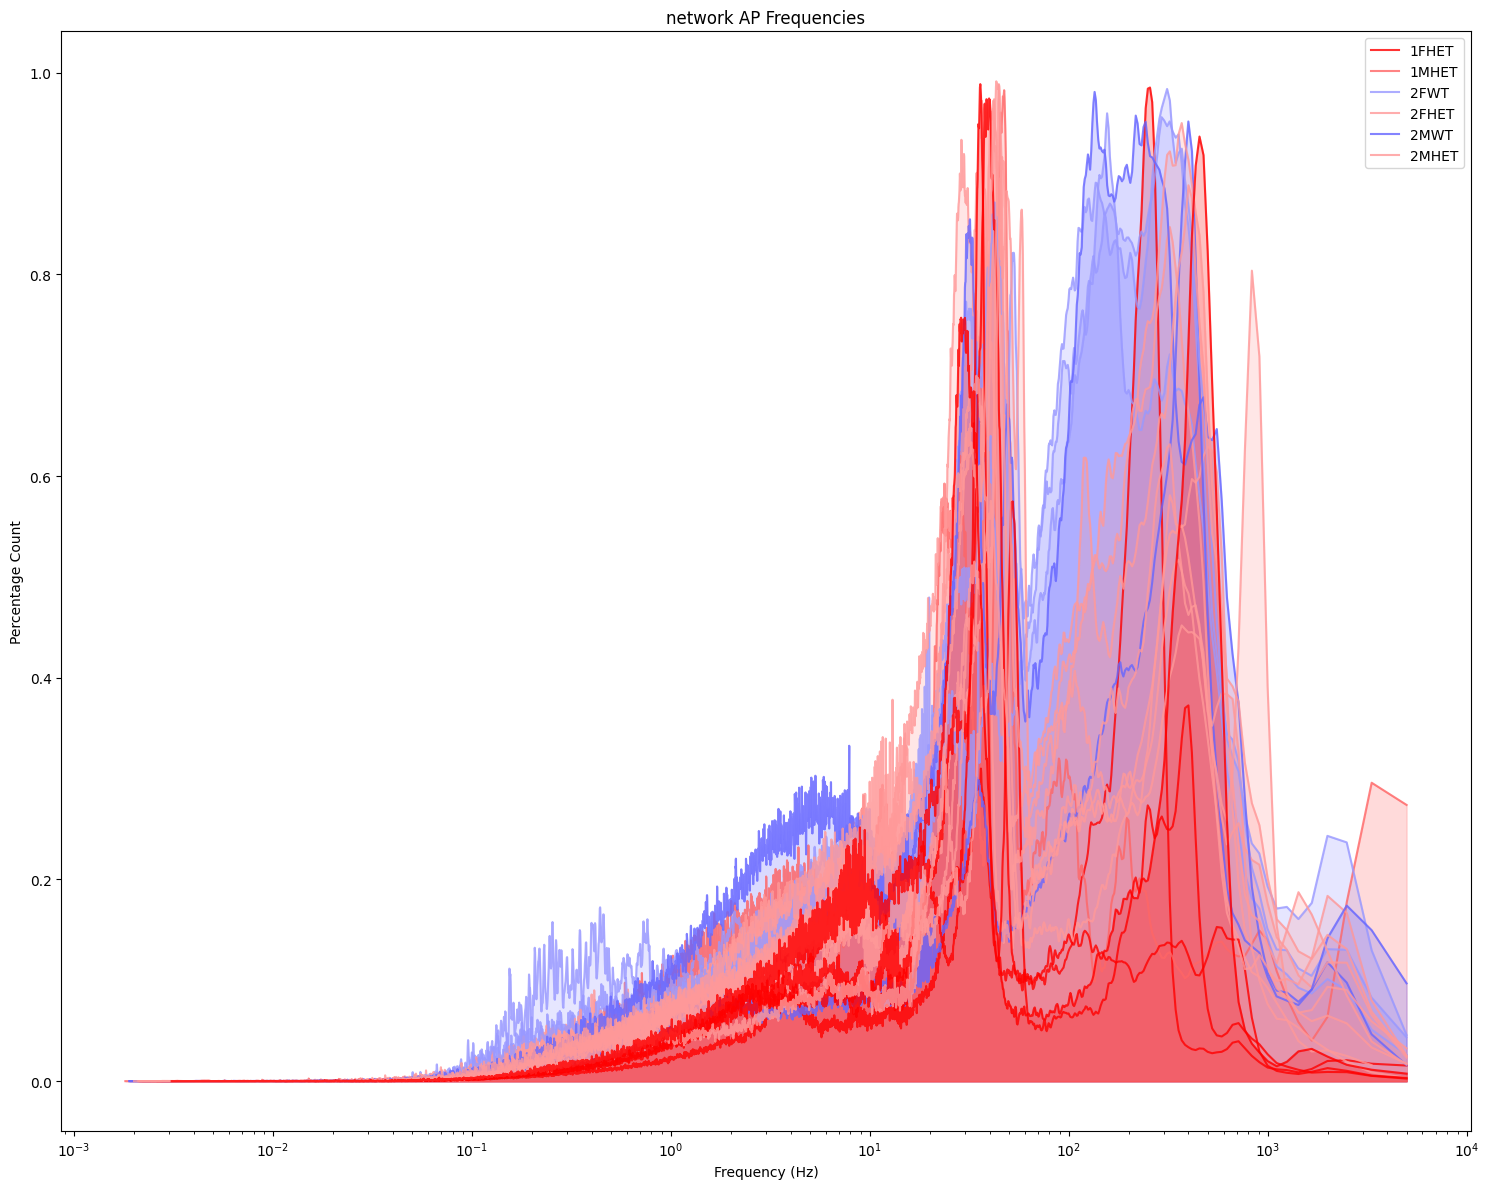

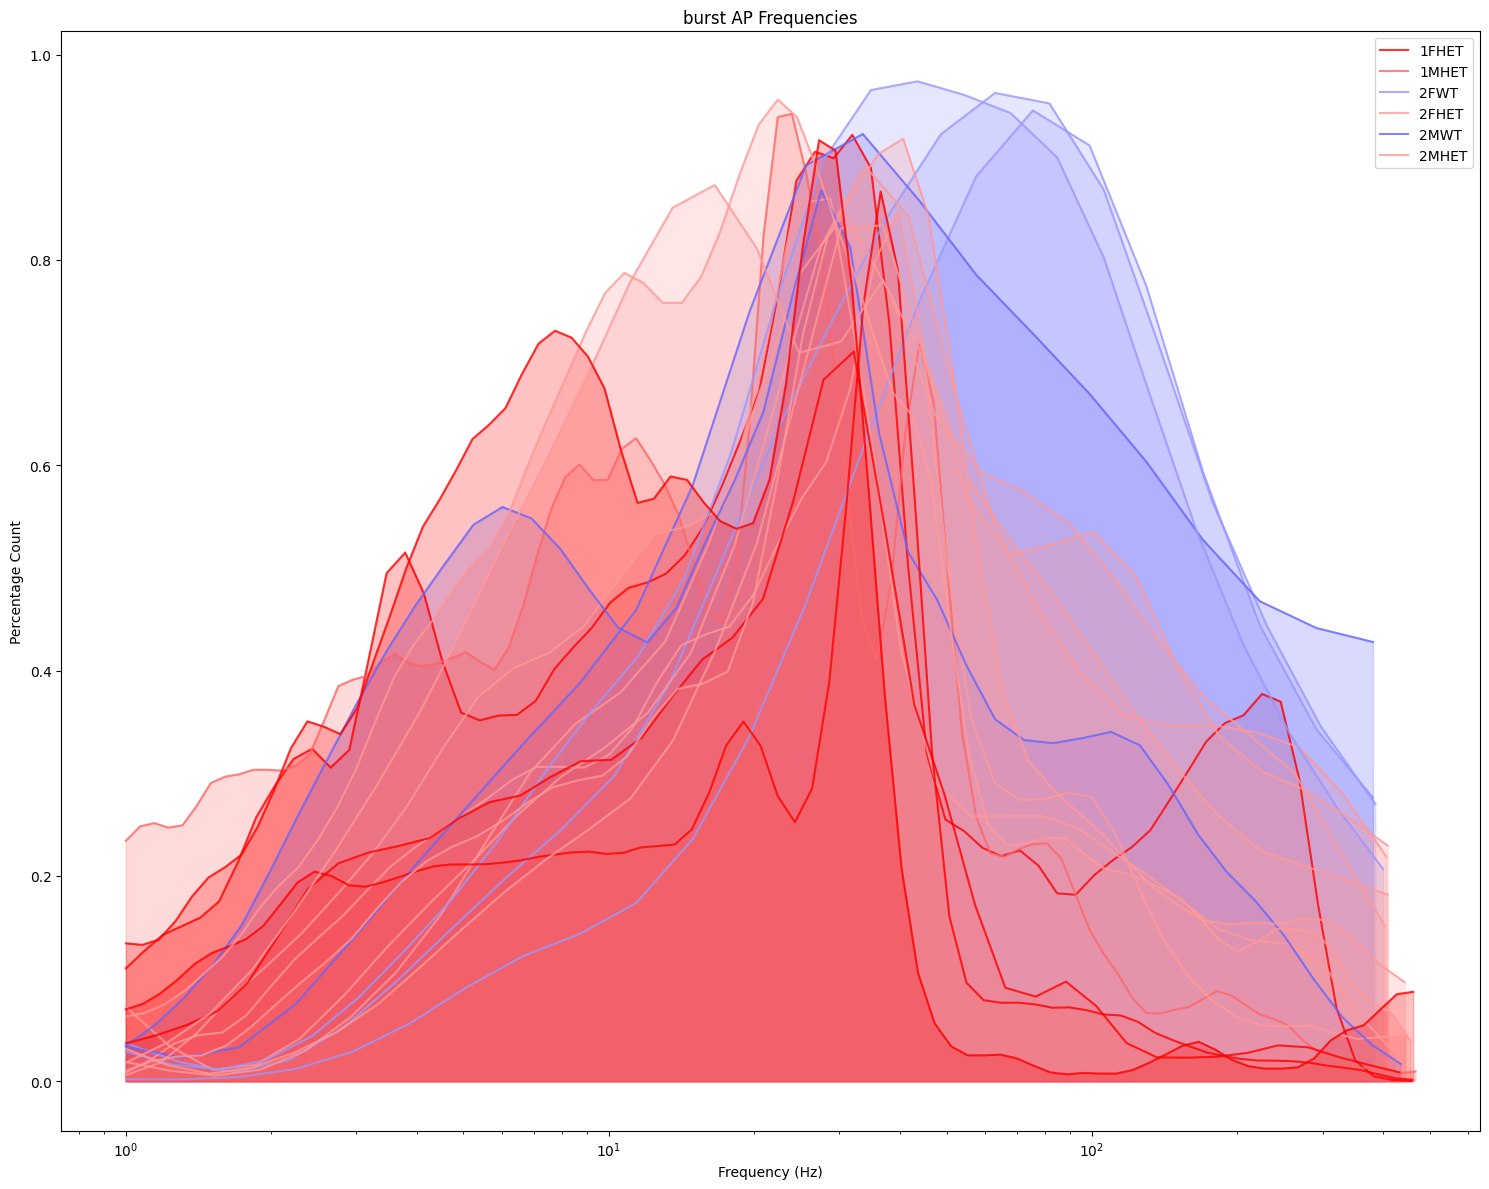

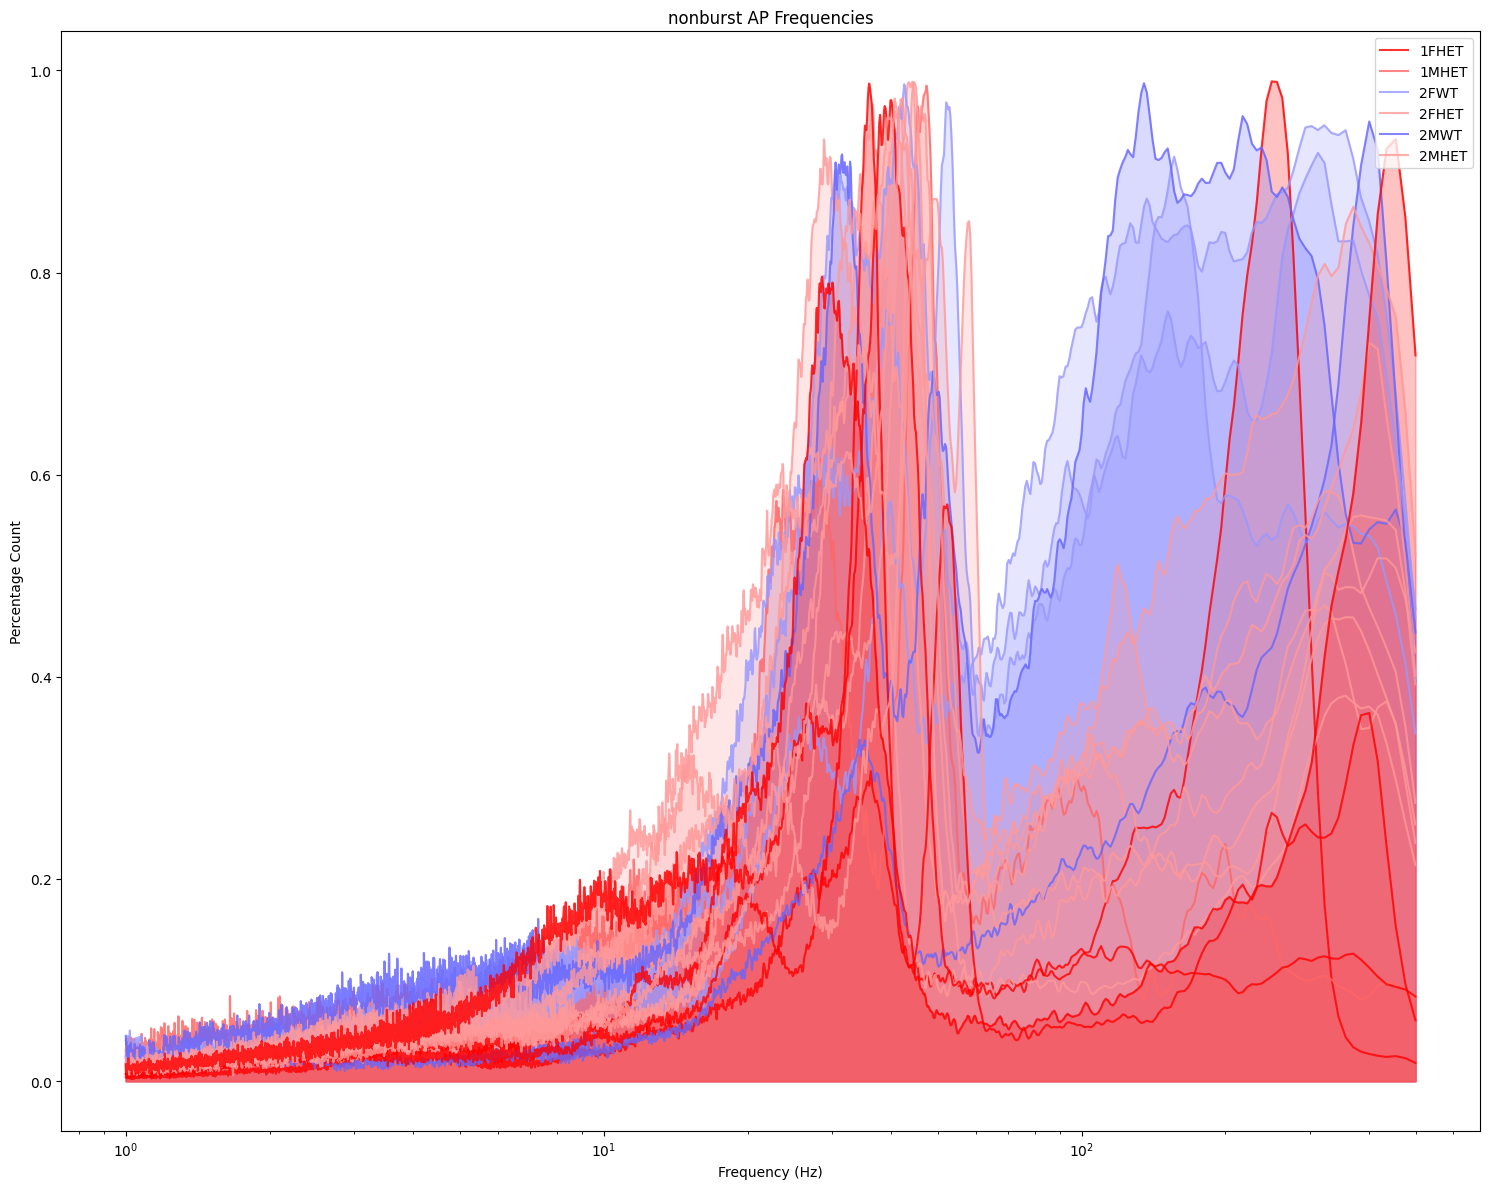

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):

    ### betw
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()

    # Define colors and transparencies for each neuron type
    
    # Define distinct colors for each neuron type
    colors = {
        '1FHET': '#FF0000',
        '1MHET': '#FF6666',
        '2FWT': '#9999FF',
        '2FHET': '#FF9999',
        '2MWT': '#6666FF',
        '2MHET': '#FF9999'
    }
    

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: np.zeros_like(max_edges[:-1]) for nt in neuron_types}  # Initialize aggregate data
        neuron_legend_added = {nt: False for nt in neuron_types}  # To control legend entry for each subplot

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]
            filtered_edges = edges[:-1][mask]

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Update aggregate data
            aggregate_data[neuron_type] += standardized_bins

            # Plot data with transparency
            alpha = 0.8
            plt.plot(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha, label=neuron_type if not neuron_legend_added[neuron_type] else "")
            plt.fill_between(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha * 0.3)  # Add shaded area

            # Ensure legend is added once per neuron type across all subplots
            if not neuron_legend_added[neuron_type]:
                neuron_legend_added[neuron_type] = True

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()


plot_line_normalize_percentage(div_data_df)

['1FHET' '1MHET' '2FWT' '2FHET' '2MWT' '2MHET']


/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


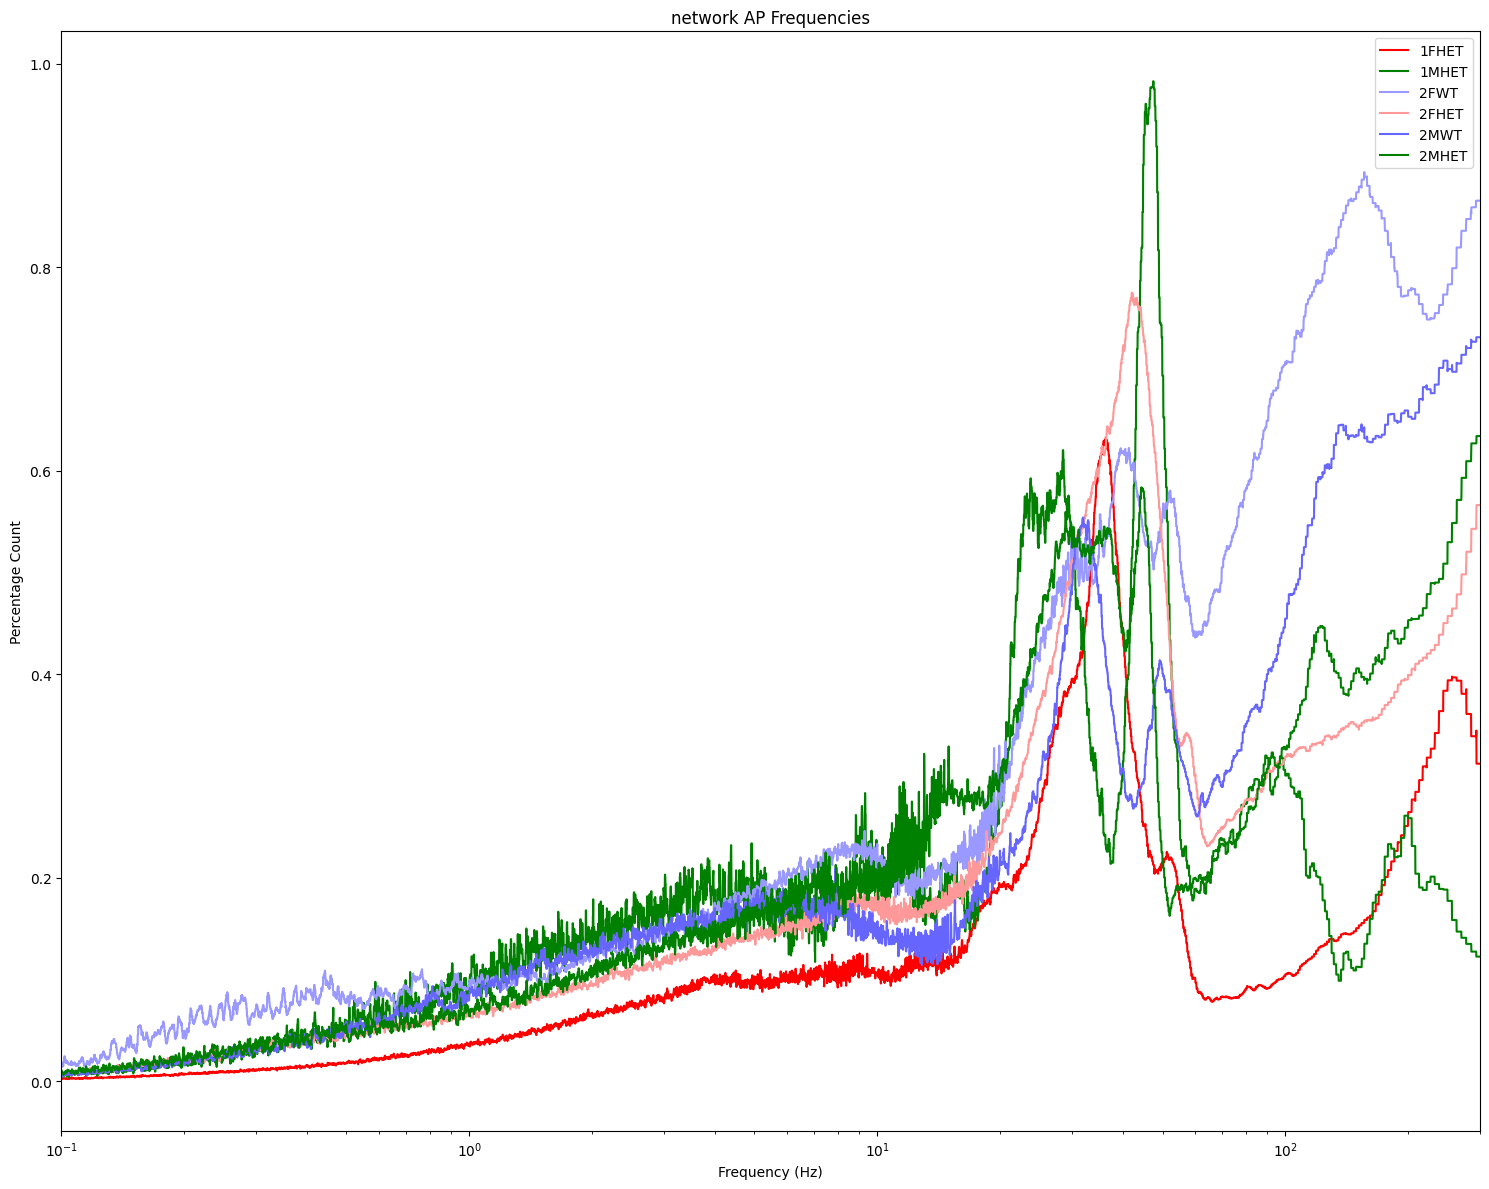

/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


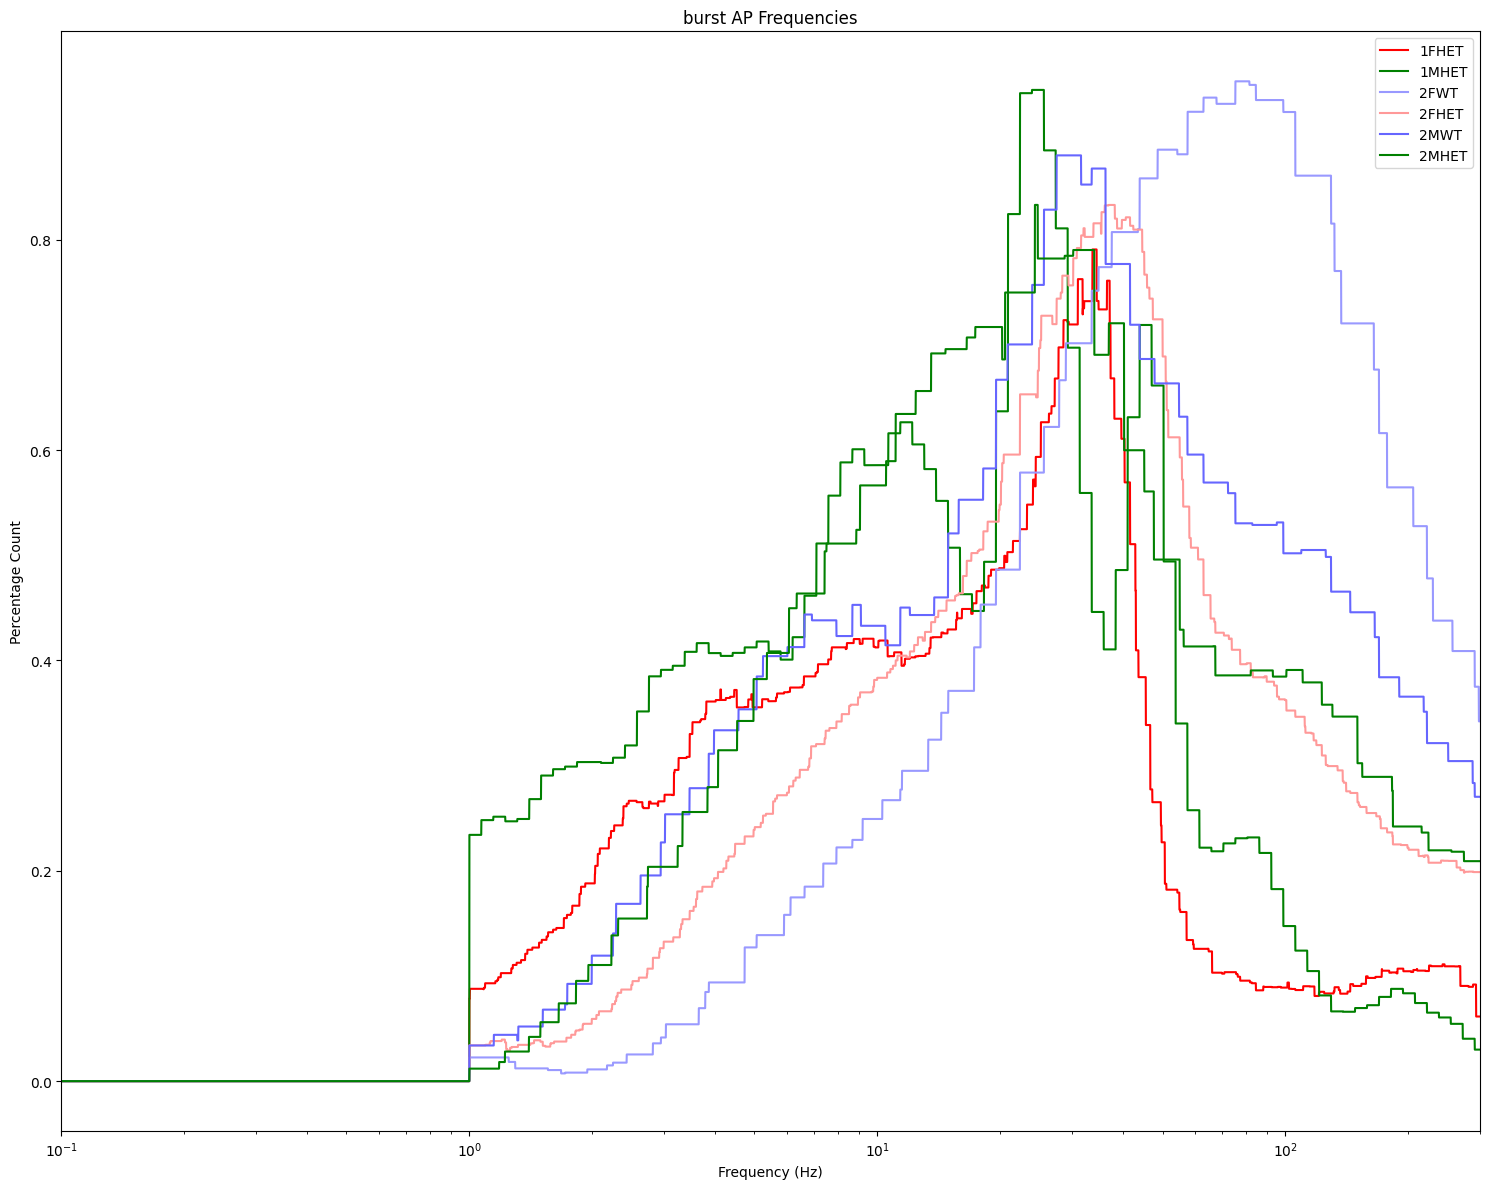

/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


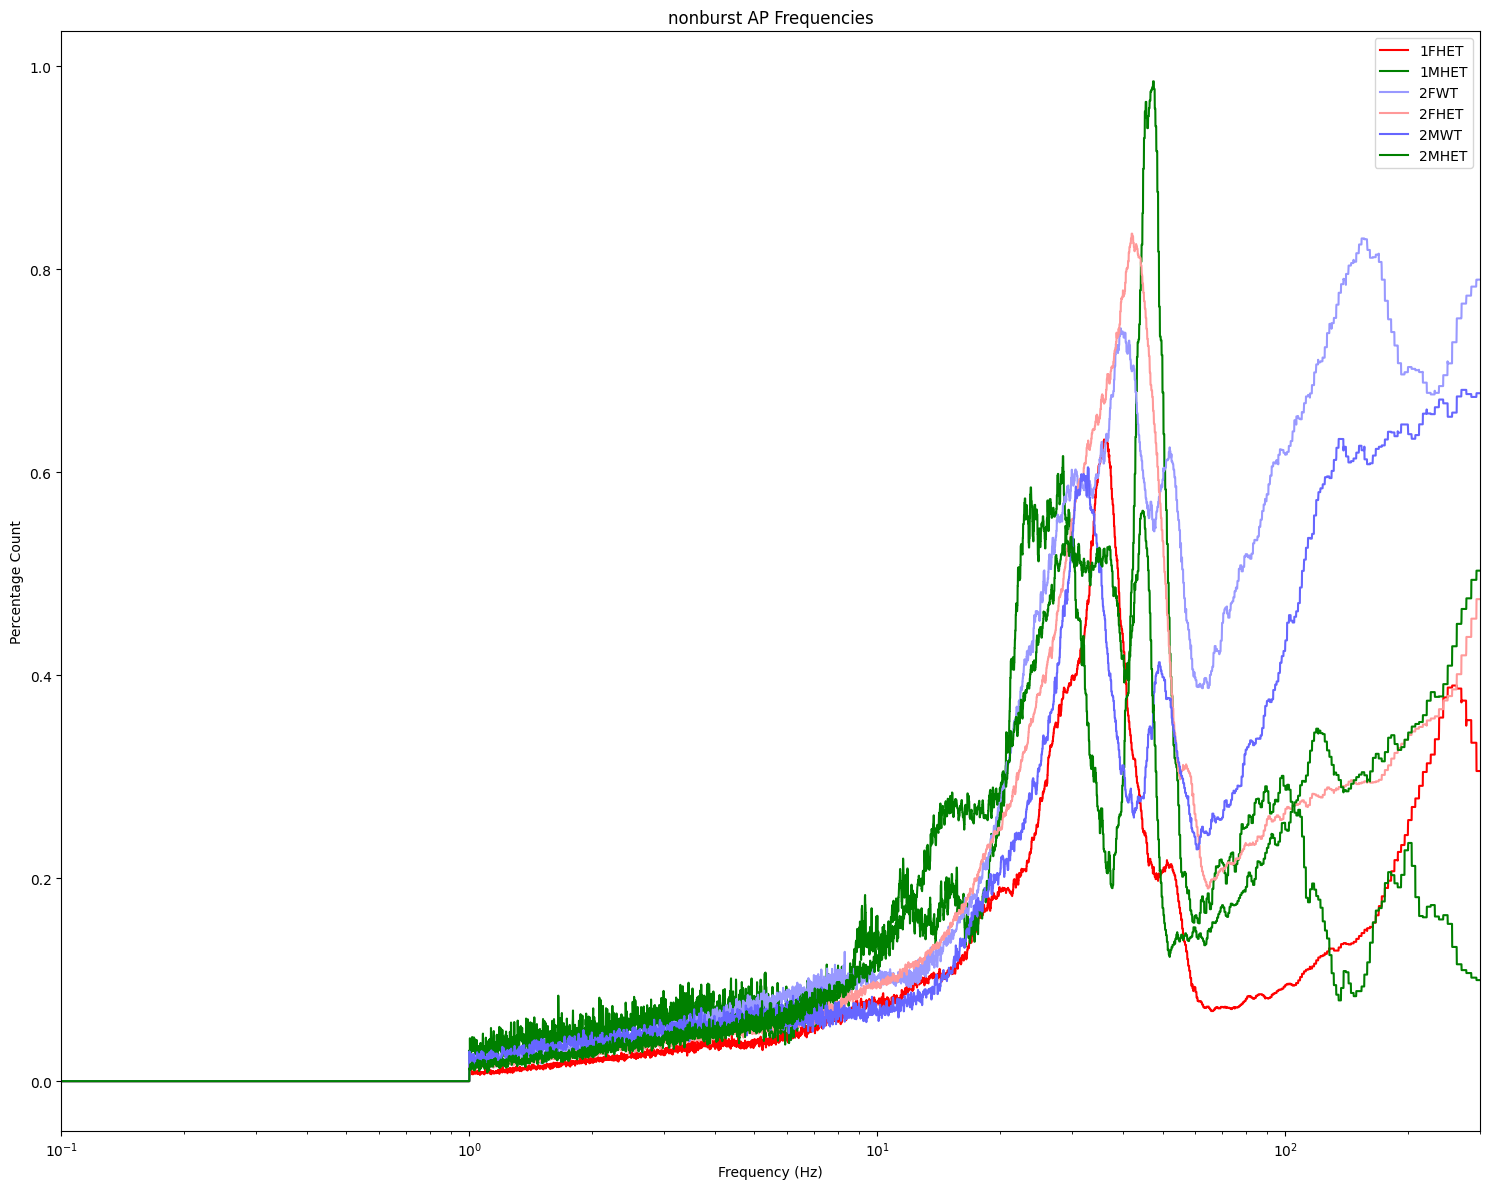

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.stats import sem  # for standard error calculation

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()
    print(neuron_types)
    # Define colors and transparencies for each neuron type
   
    # Define distinct colors for each neuron type
    colors = {
        '1FHET': '#FF0000',
        '1MHET':  'green',#'#FF6666',
        '2FWT': '#9999FF',
        '2FHET': '#FF9999',
        '2MWT': '#6666FF',
        '2MHET':  'green'#'#FF9999'
    }

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: [] for nt in neuron_types}  # Store all normalized bins for each neuron type

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]
            filtered_edges = edges[:-1][mask]

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Append to aggregate data
            aggregate_data[neuron_type].append(standardized_bins)

        for neuron_type, bins_list in aggregate_data.items():
            if bins_list:
                # Convert to numpy array for easier calculations
                bins_array = np.array(bins_list)

                # Calculate mean and standard error
                mean_bins = np.mean(bins_array, axis=0)
                stderr_bins = sem(bins_array, axis=0)

                # Plot data with transparency and shaded error area
                plt.plot(max_edges[:-1], mean_bins, color=colors[neuron_type], label=neuron_type)
                #plt.fill_between(max_edges[:-1], mean_bins - stderr_bins, mean_bins + stderr_bins, color=colors[neuron_type], alpha=0.3)

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')
        plt.xlim(0.1, 300)
        plt.tight_layout()
        plt.show()

plot_line_normalize_percentage(div_data_df)

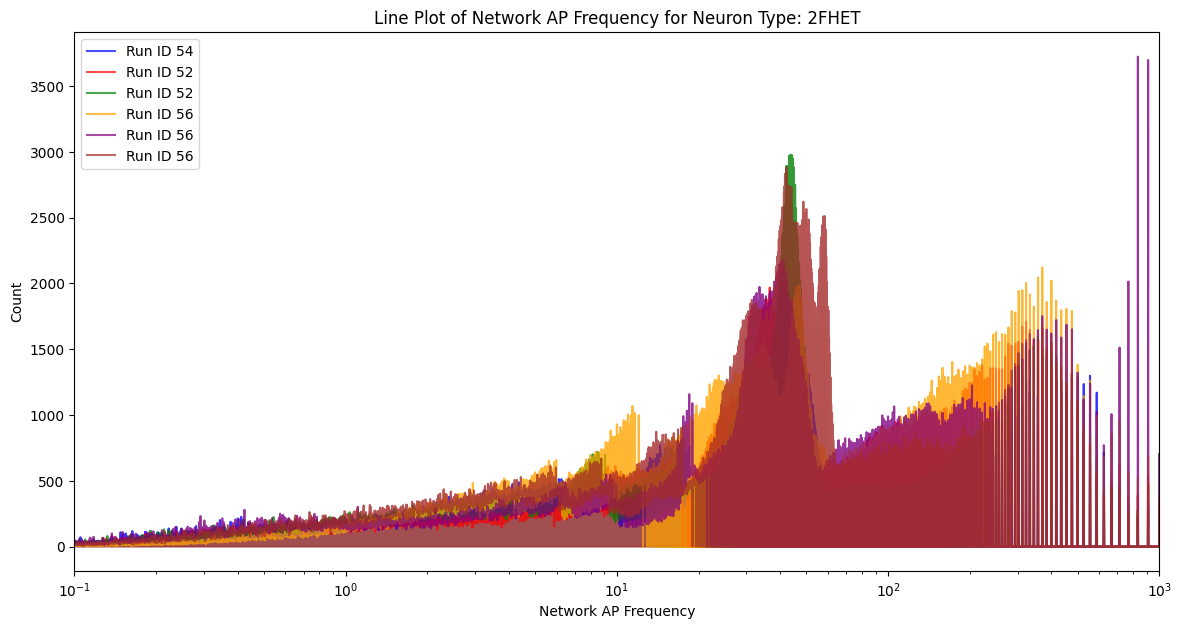

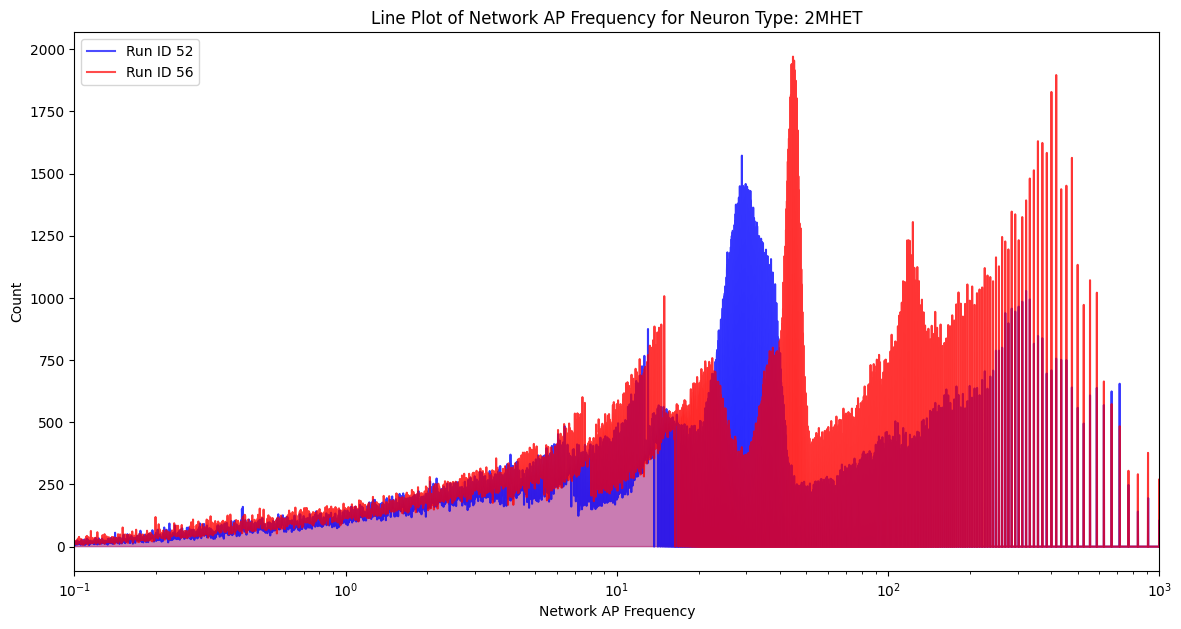

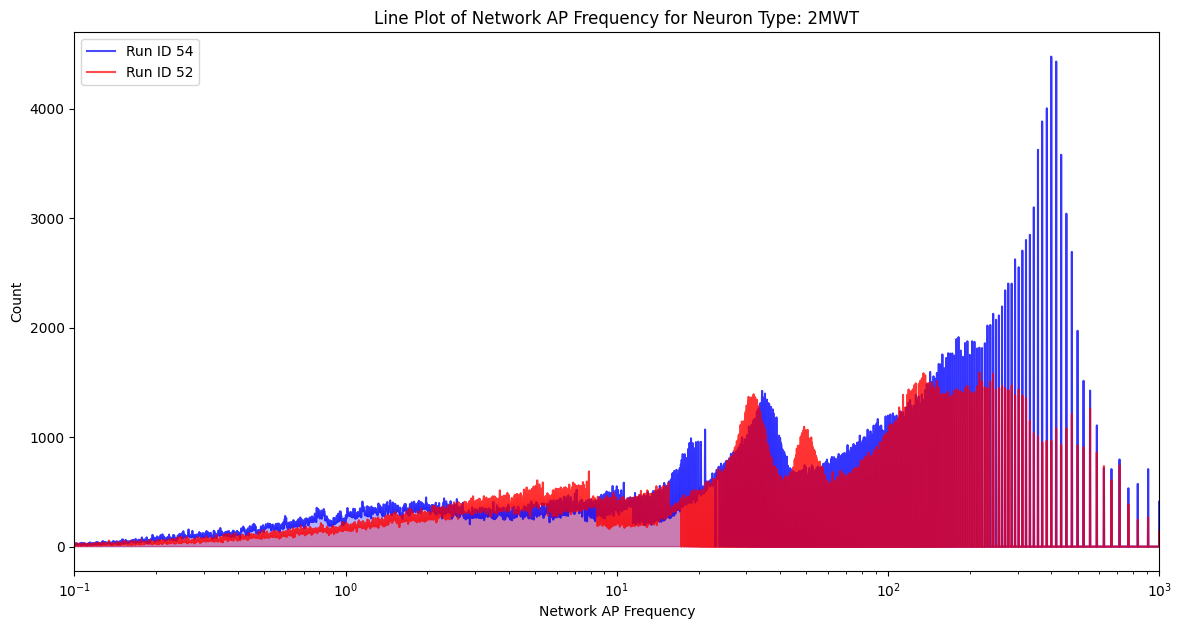

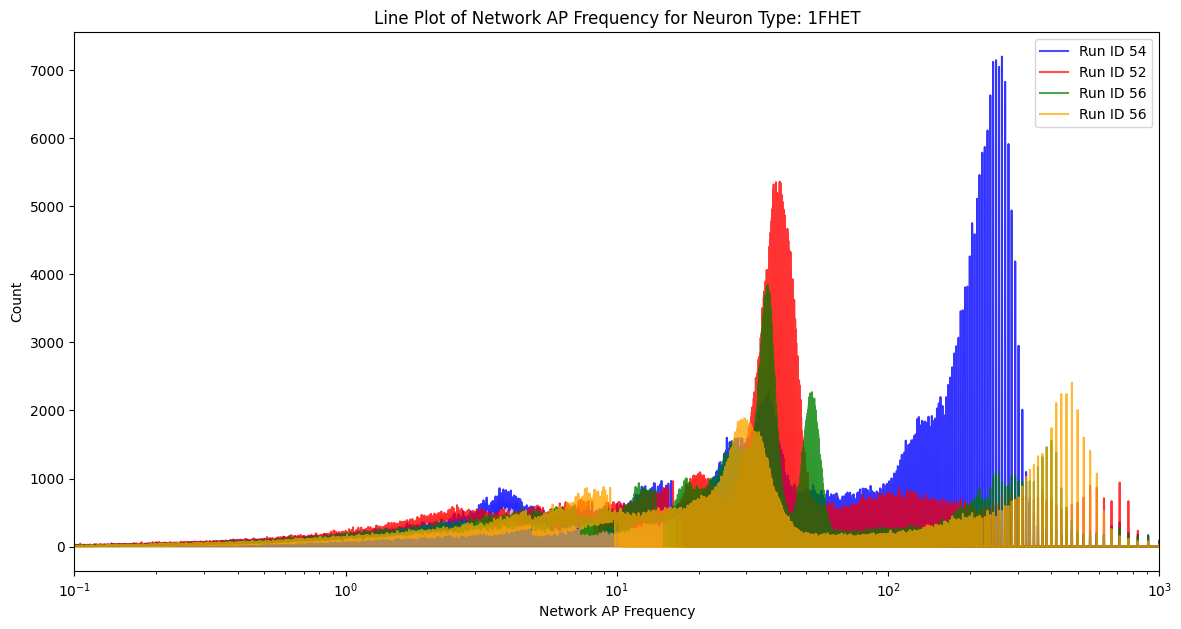

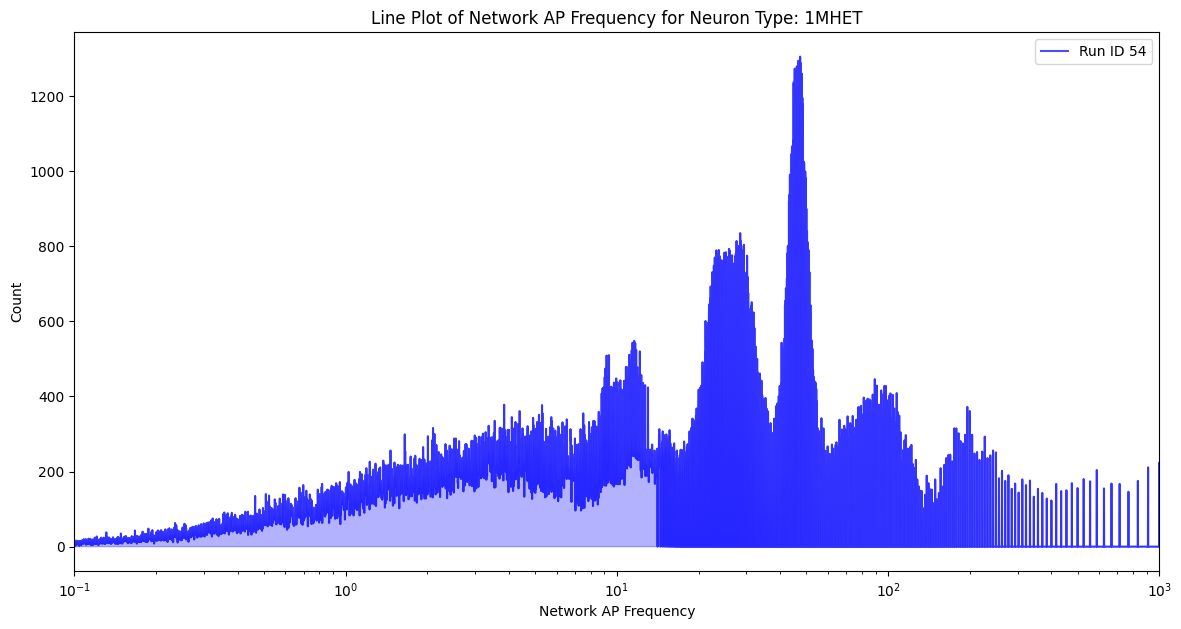

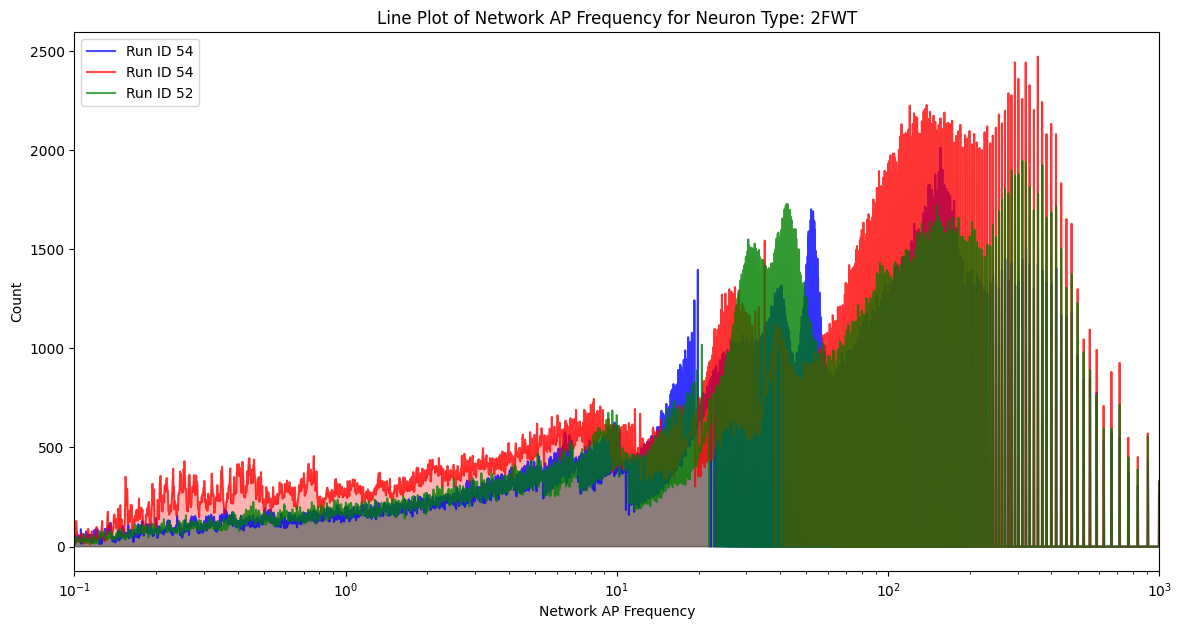

In [54]:
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = network_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(div_data_df['NeuronType'], div_data_df['networkAPFreqBins'], div_data_df['networkAPFreqEdges'], div_data_df['Run_ID'])

In [ ]:
#Plotting it again without normalization Network AFP Freq bins and edges but this time taking DIV==21

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/3514999839.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


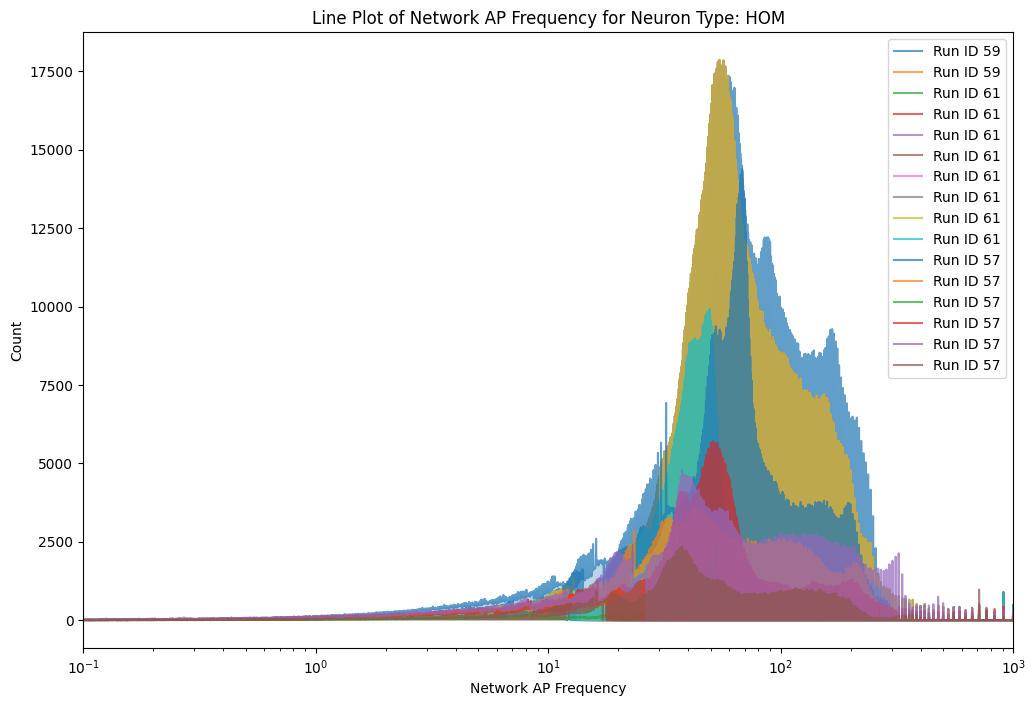

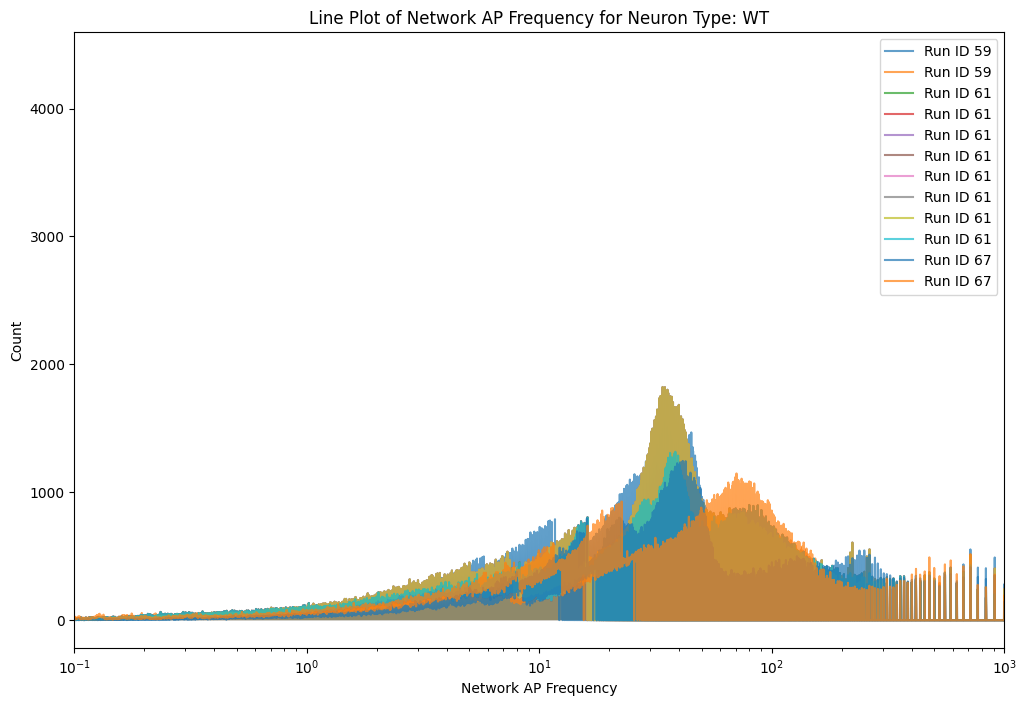

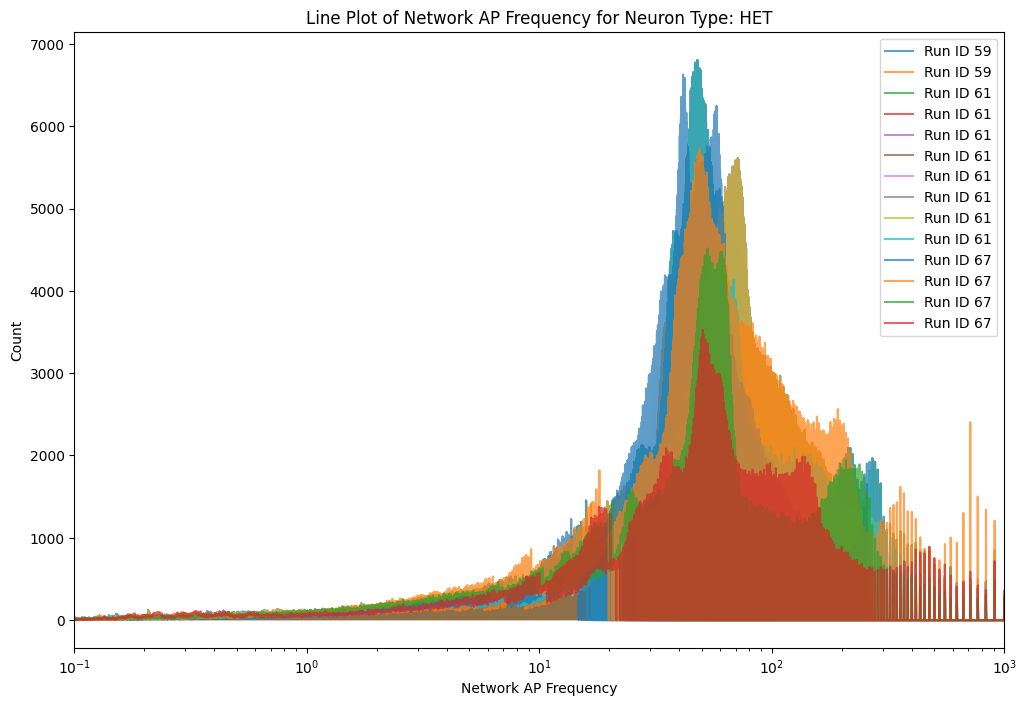

In [62]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            #print("DIV 21 found!")
            neuron_type = metric['NeuronType'][0][0]
            bins = metric['networkAPFreqBins'][0][0]
            edges = metric['networkAPFreqEdges'][0][0]
            run_id = metric['Run_ID'][0][0]

            if bins.size > 0 and edges.size > 0:
                neuron_types.append(neuron_type)
                network_ap_freq_bins.append(bins)
                network_ap_freq_edges.append(edges)
                run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(12, 8))
        for i in indices:
            # Ensure x and y have the same length
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[i]}')
                plt.fill_between(x, y, alpha=0.3)
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#Now plotting where the DIV is 21 and the RUN_ID is 57 and 59. Still without normalization 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1121242136.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


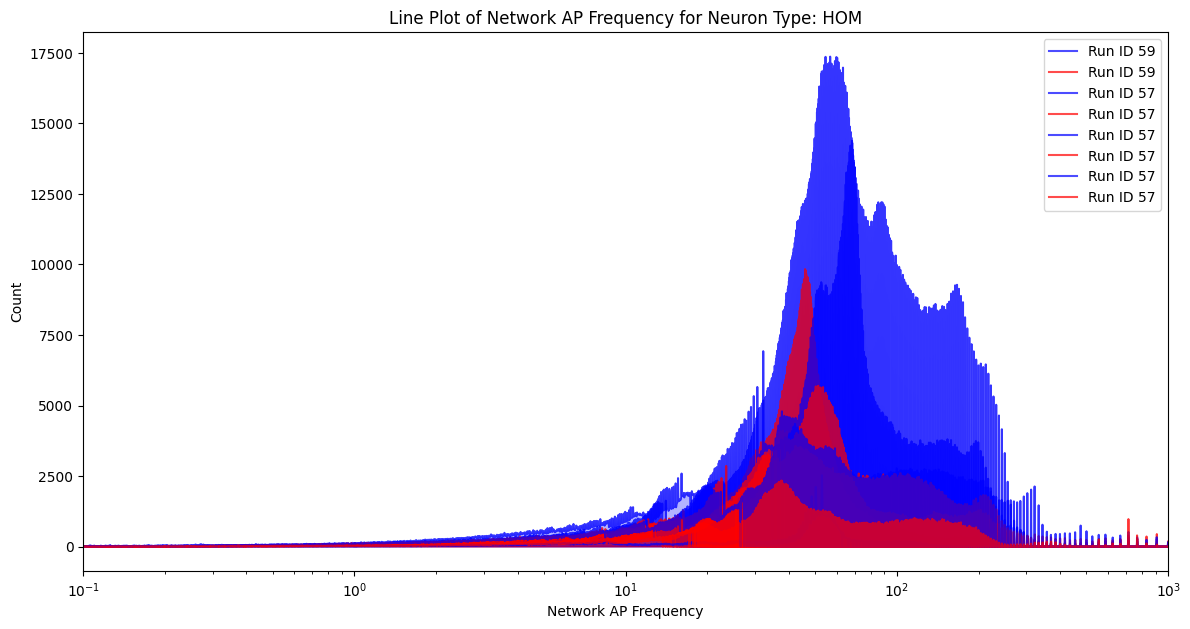

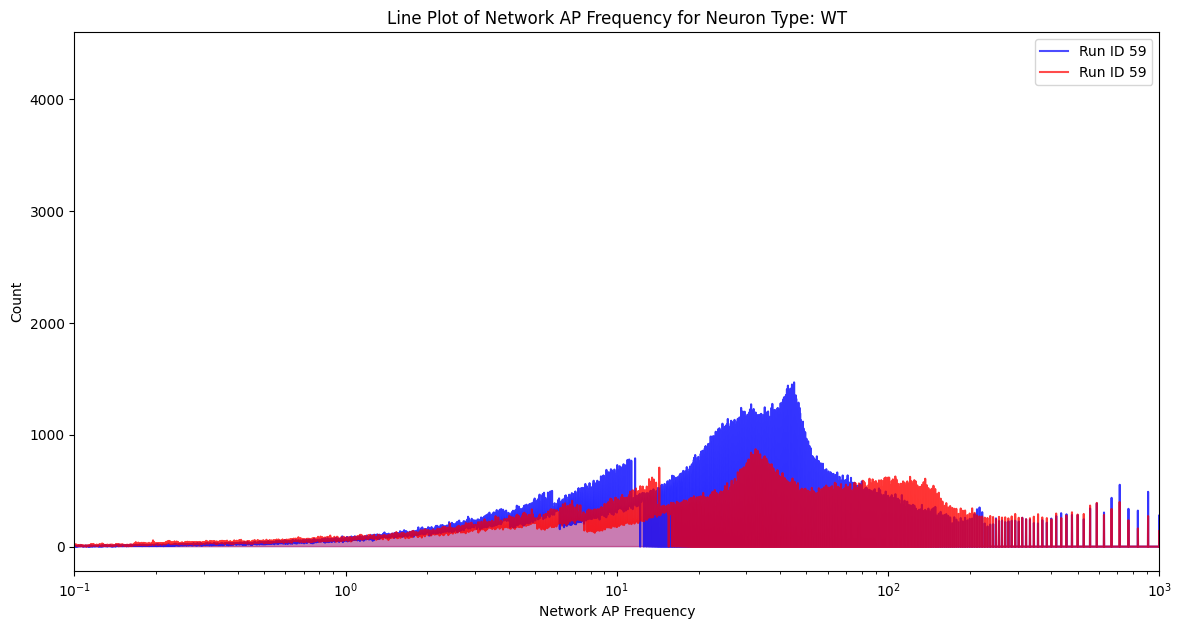

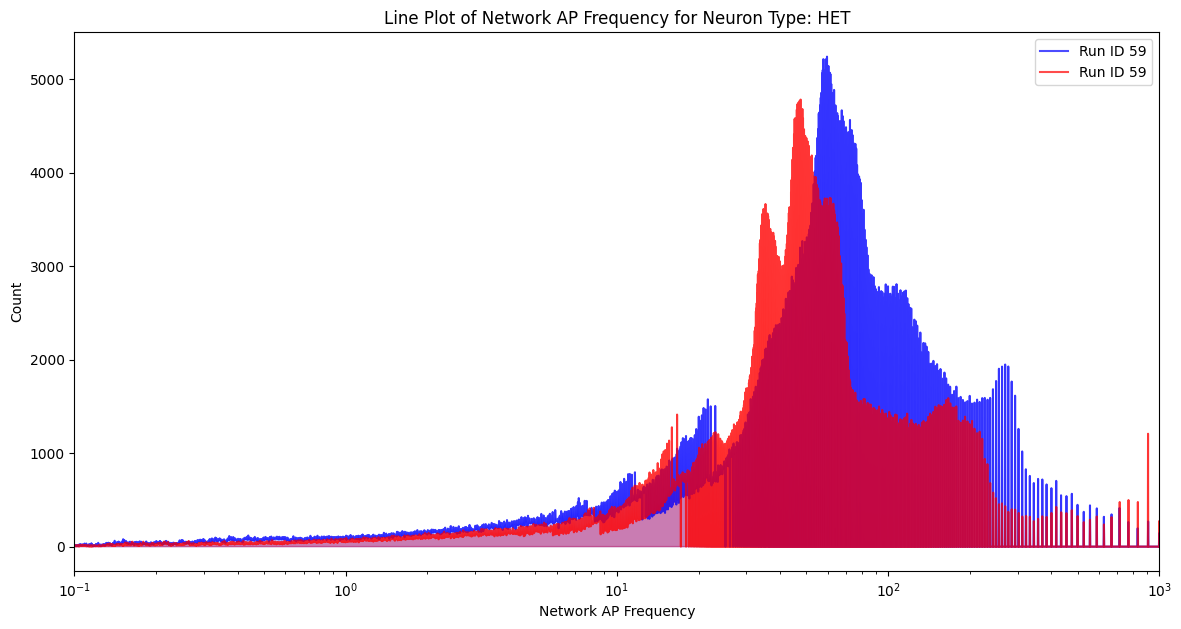

In [63]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = network_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#Plotting the normalized graphs where the DIV is 21 and the RUN_ID is 57 and 59. 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_72931/2717064916.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


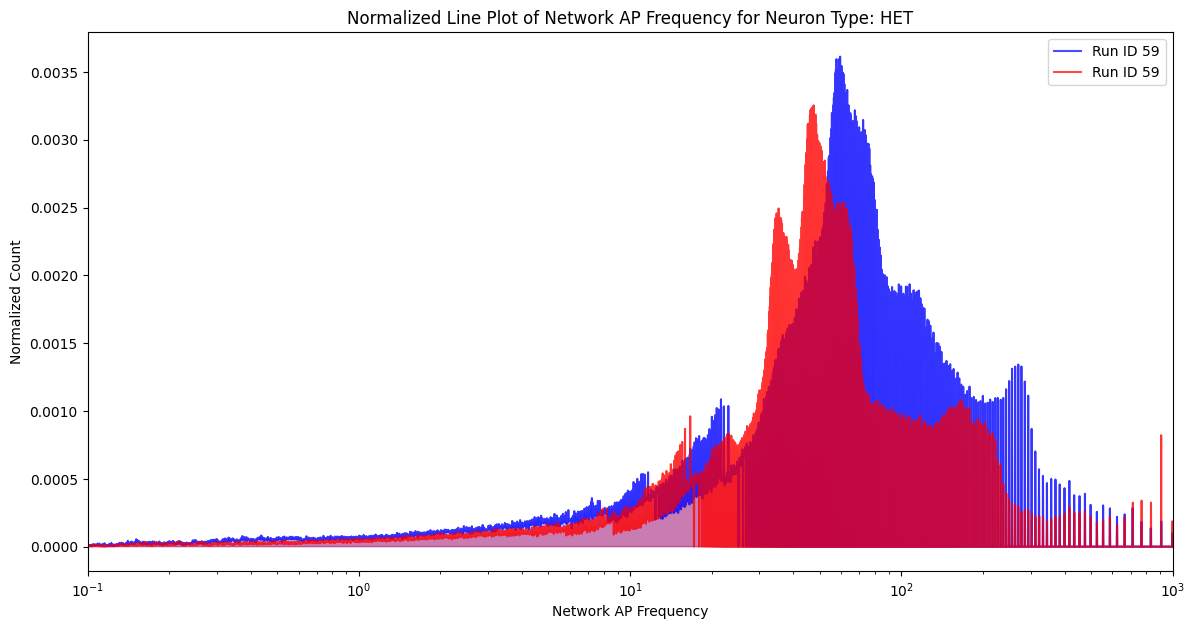

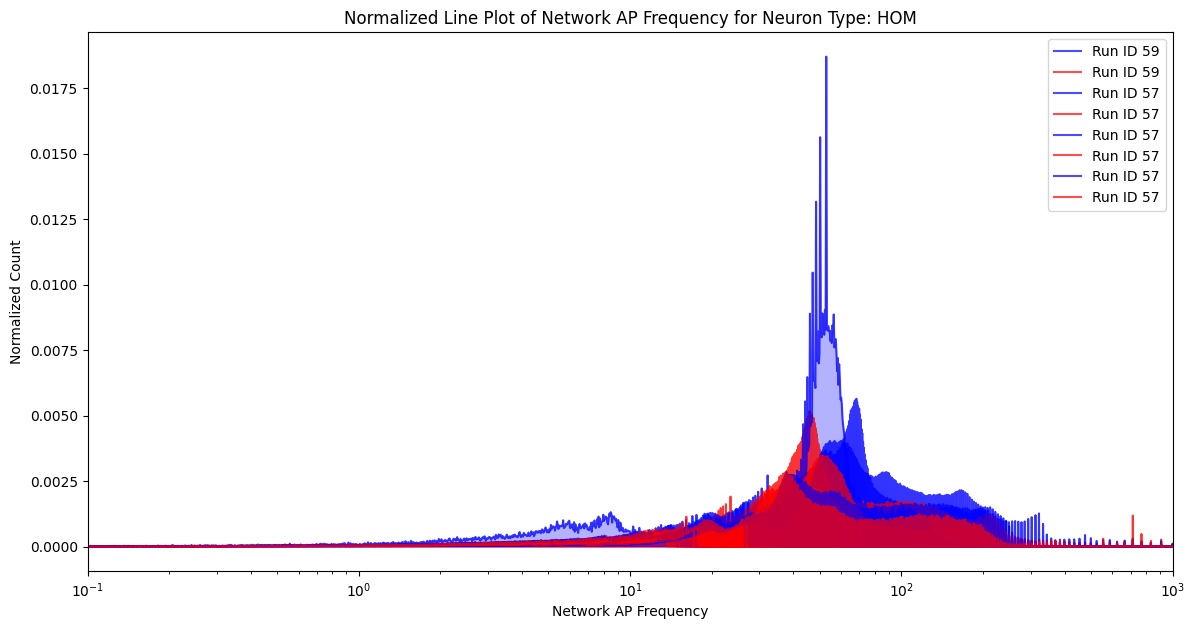

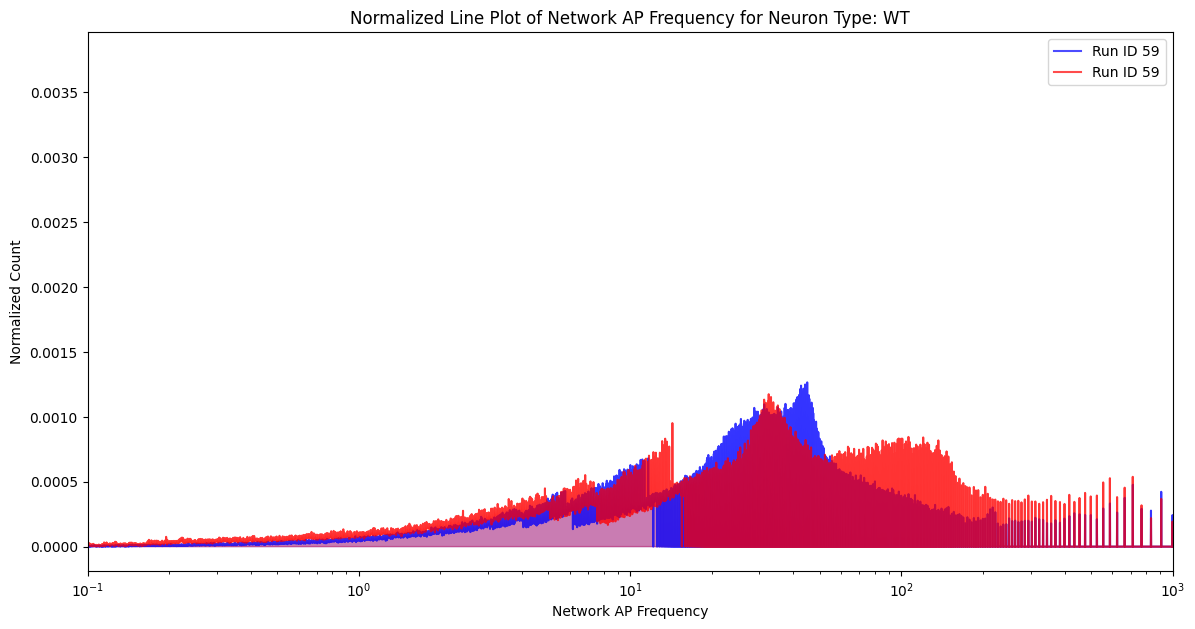

In [1]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#Plotting normalized means and standard error  where the DIV is 21 and the RUN_ID is 57 and 59.

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_8284/2520500595.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


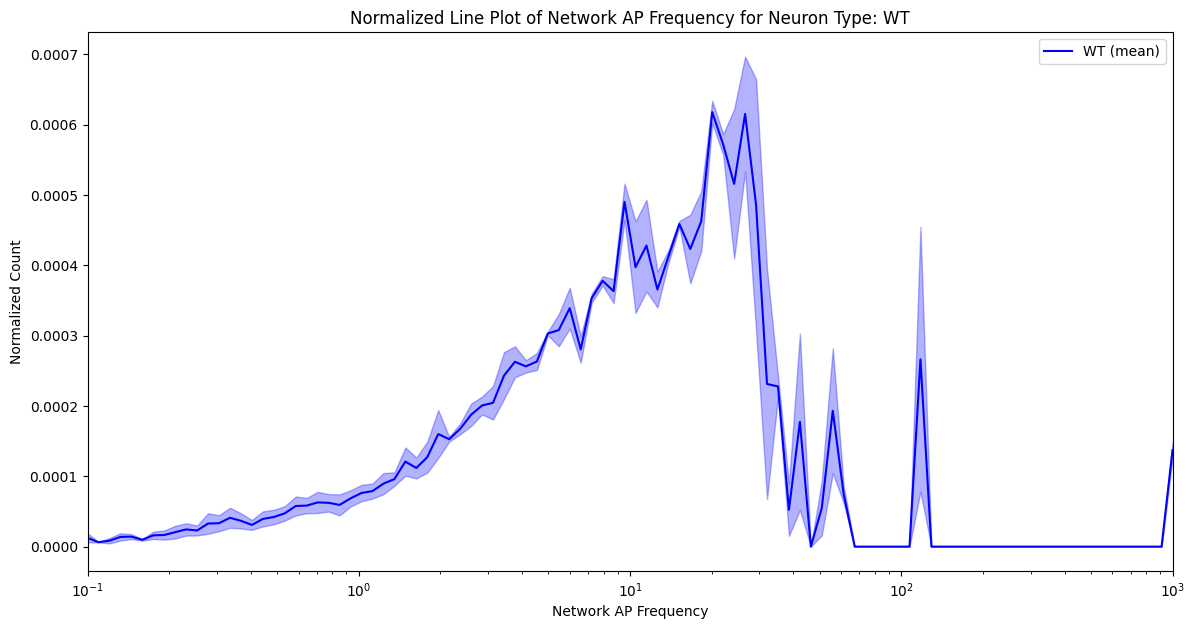

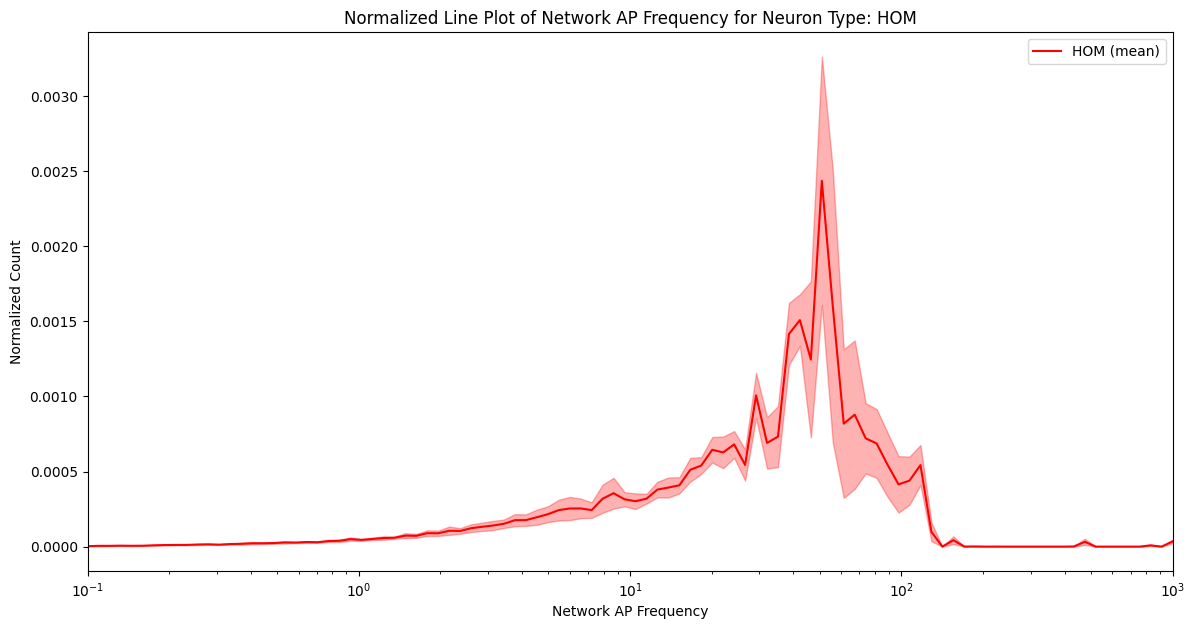

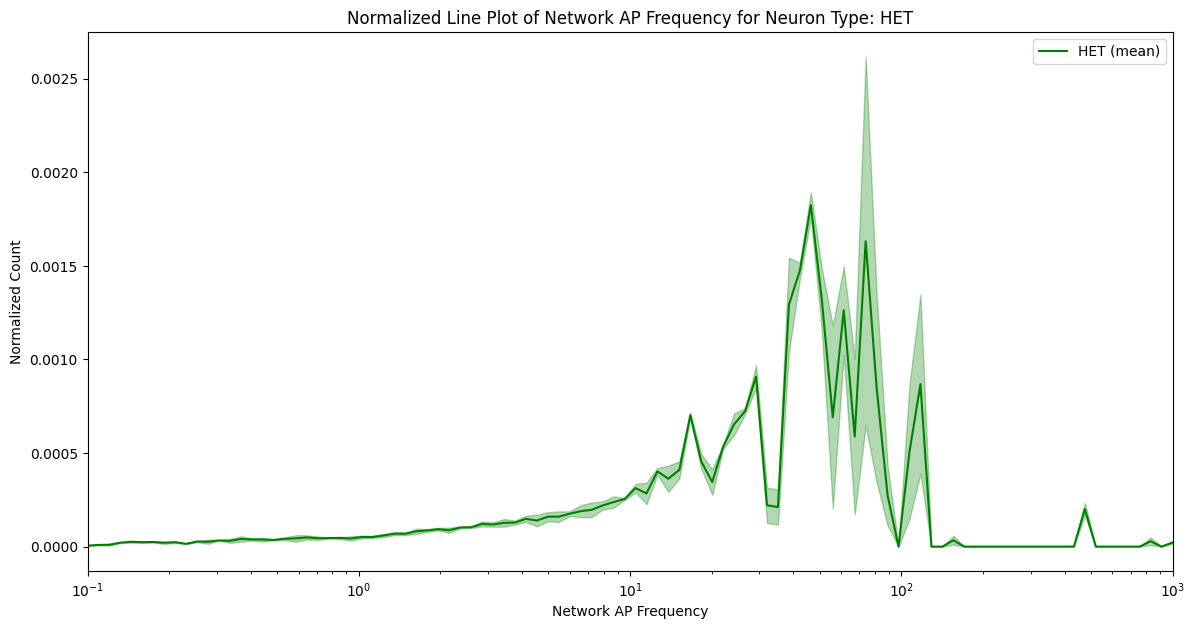

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = [] 
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to interpolate bins to a common x-axis
def interpolate_bins(x, y, common_x):
    return np.interp(common_x, x, y)

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    common_x = np.logspace(-1, 3, 100)  # Define a common x-axis for interpolation

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        all_bins = []
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                y_interp = interpolate_bins(x, y, common_x)
                all_bins.append(y_interp)
        
        if all_bins:
            all_bins = np.array(all_bins)
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(all_bins.shape[0])
            
            plt.plot(common_x, mean_bins, label=f'{neuron_type} (mean)', color=colors.get(neuron_type, 'black'))
            plt.fill_between(common_x, mean_bins - sem_bins, mean_bins + sem_bins, color=colors.get(neuron_type, 'black'), alpha=0.3)
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#putting the above graphs into a single graph 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_72931/4140295522.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


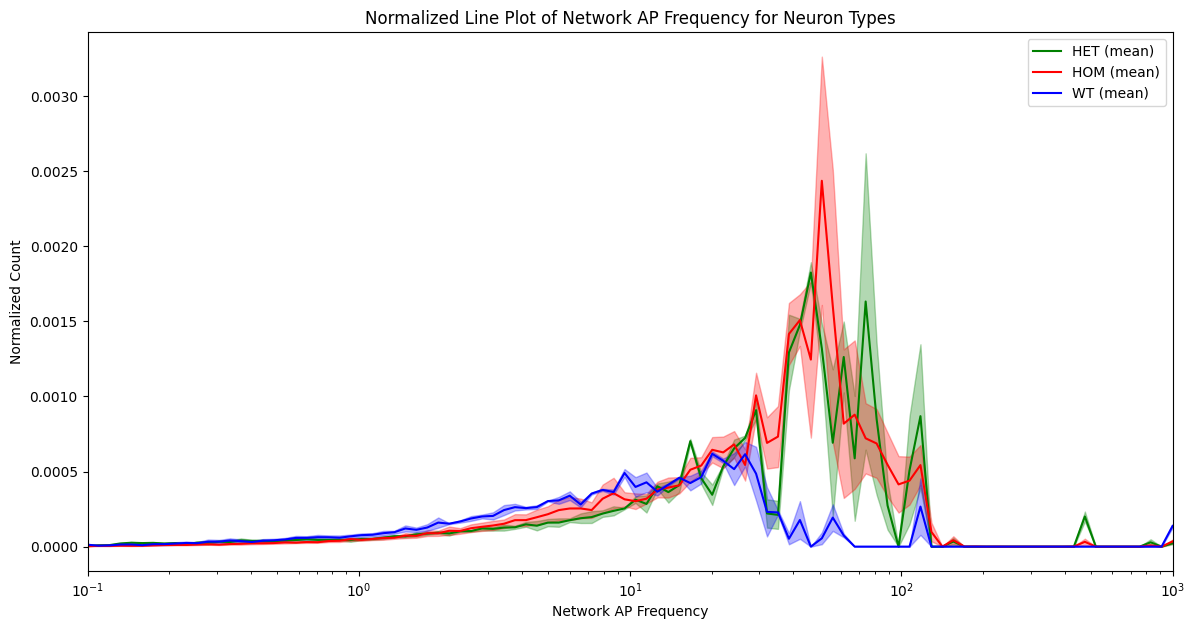

In [5]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to interpolate bins to a common x-axis
def interpolate_bins(x, y, common_x):
    return np.interp(common_x, x, y)

# Function to plot histograms for all neuron types in a single graph
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    common_x = np.logspace(-1, 3, 100)  # Define a common x-axis for interpolation

    plt.figure(figsize=(14, 7))
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        all_bins = []
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                y_interp = interpolate_bins(x, y, common_x)
                all_bins.append(y_interp)
        
        if all_bins:
            all_bins = np.array(all_bins)
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(all_bins.shape[0])
            
            plt.plot(common_x, mean_bins, label=f'{neuron_type} (mean)', color=colors.get(neuron_type, 'black'))
            plt.fill_between(common_x, mean_bins - sem_bins, mean_bins + sem_bins, color=colors.get(neuron_type, 'black'), alpha=0.3)
    
    plt.xscale('log')
    plt.xlabel('Network AP Frequency')
    plt.ylabel('Normalized Count')
    plt.title('Normalized Line Plot of Network AP Frequency for Neuron Types')
    plt.legend()
    plt.xlim(0.1, 1000)  # Extending the x-axis range
    plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#Network using Burst APF edges and bins where DIV is 21

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1535842799.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


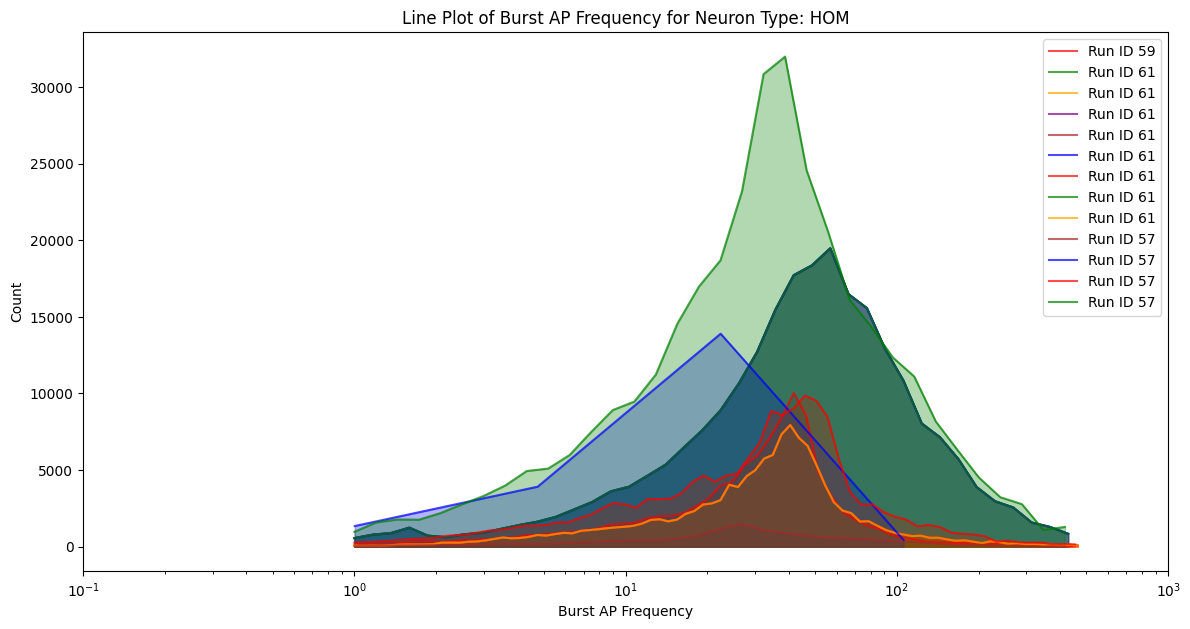

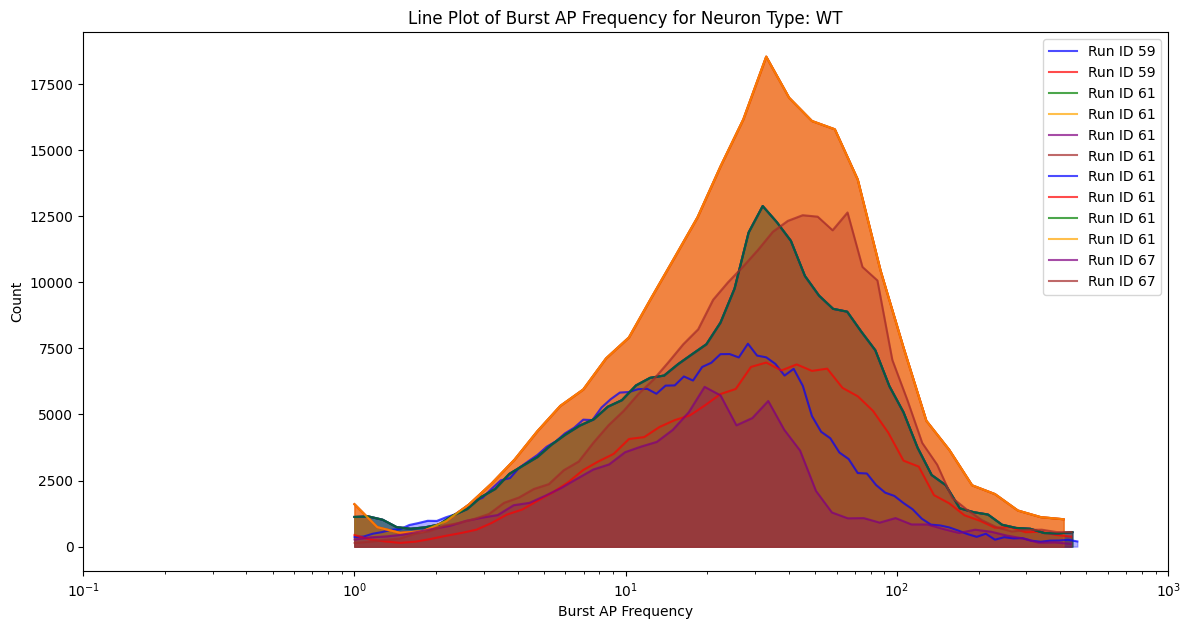

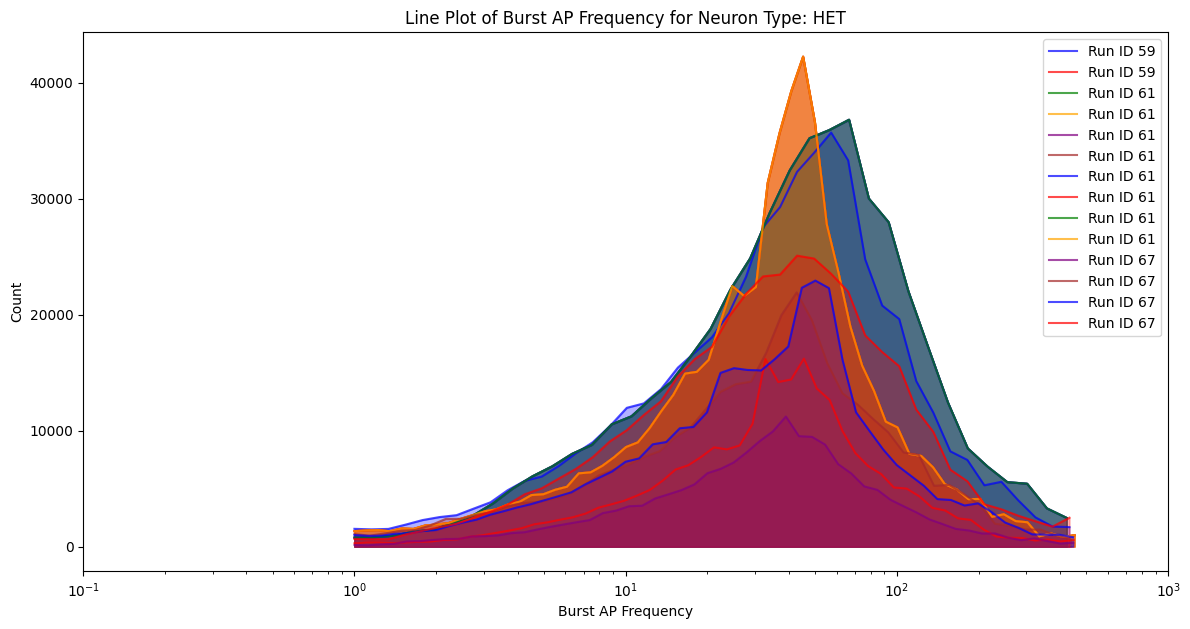

In [61]:


import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
burst_ap_freq_bins = []
burst_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            
            neuron_type = metric['NeuronType'][0][0]
            bins = metric['burstAPFreqBins'][0][0]
            edges = metric['burstAPFreqEdges'][0][0]
            run_id = metric['Run_ID'][0][0]

            if bins.size > 0 and edges.size > 0:
                neuron_types.append(neuron_type)
                burst_ap_freq_bins.append(bins)
                burst_ap_freq_edges.append(edges)
                run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
burst_ap_freq_bins = [bins.flatten() for bins in burst_ap_freq_bins]
burst_ap_freq_edges = [edges.flatten() for edges in burst_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = burst_ap_freq_edges[idx][:-1]
            y = burst_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Burst AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Burst AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids)


In [ ]:
#Taking only 57 and 59 and DIV to be 21 now for Burst AP Frequency 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1743704851.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


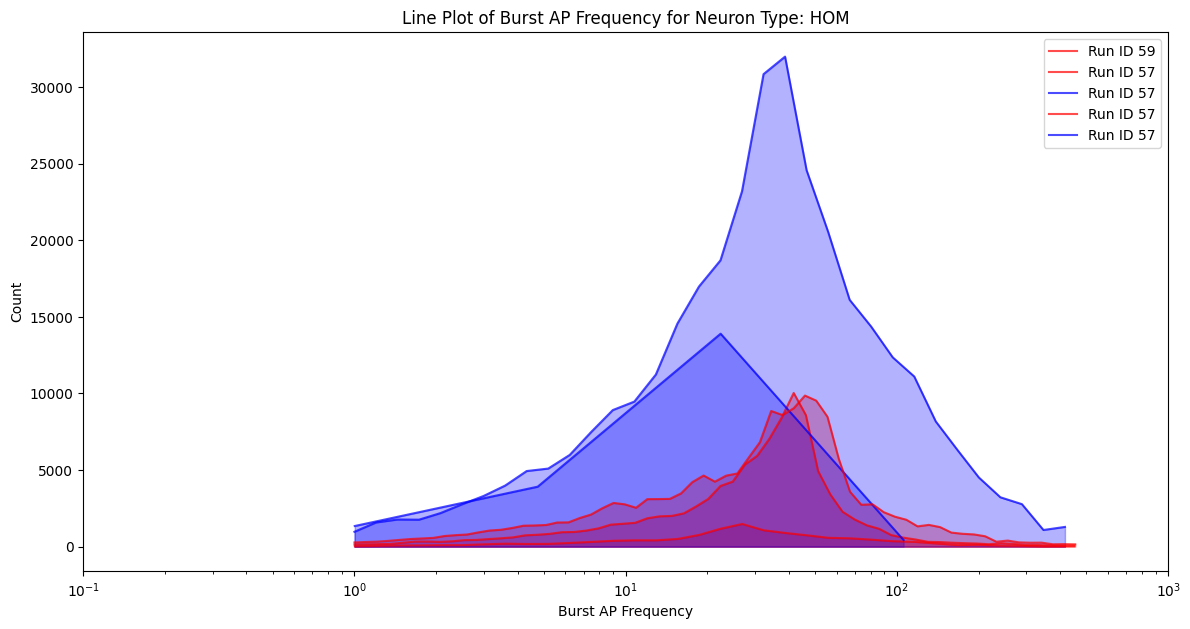

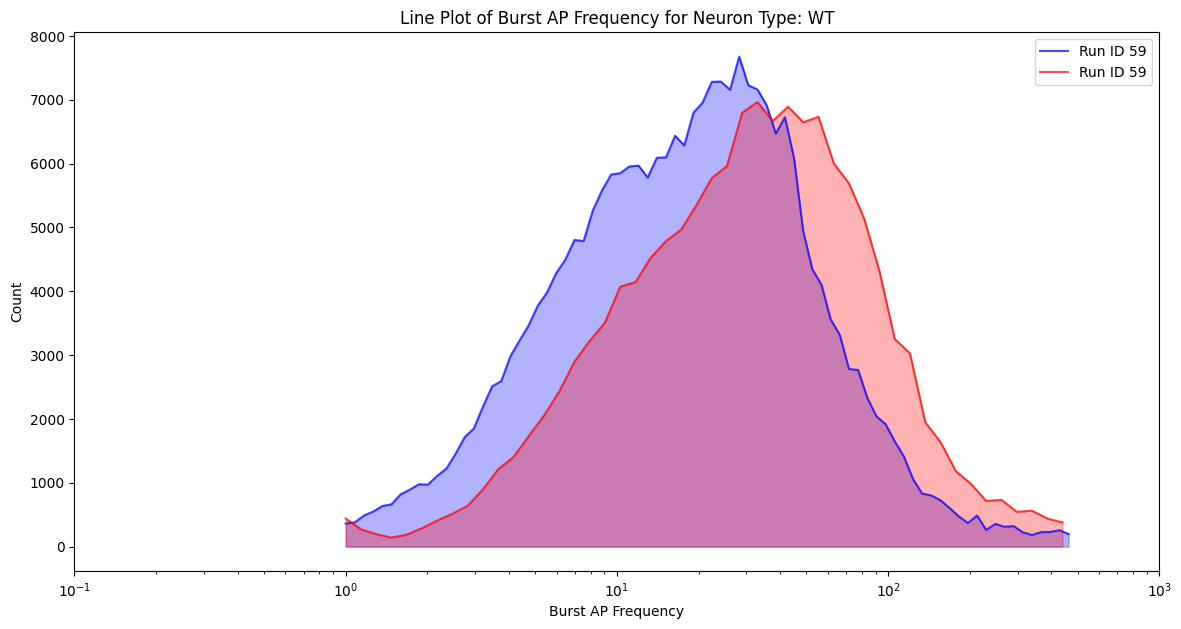

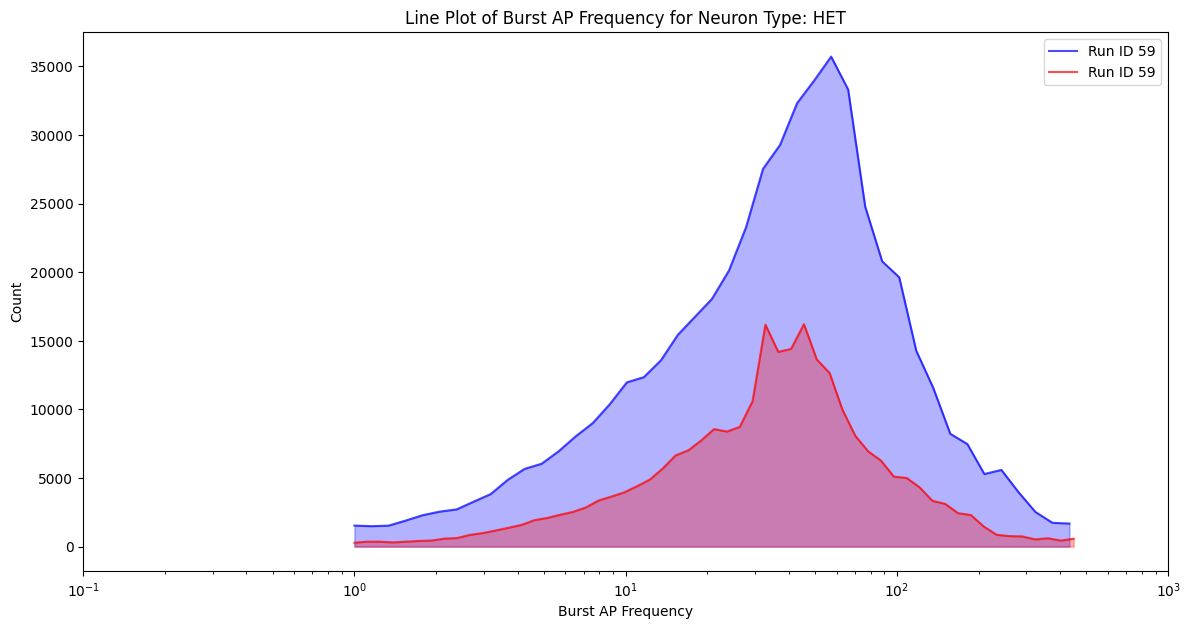

In [59]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
burst_ap_freq_bins = []
burst_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]: # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['burstAPFreqBins'][0][0]
                edges = metric['burstAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    burst_ap_freq_bins.append(bins)
                    burst_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
burst_ap_freq_bins = [bins.flatten() for bins in burst_ap_freq_bins]
burst_ap_freq_edges = [edges.flatten() for edges in burst_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = burst_ap_freq_edges[idx][:-1]
            y = burst_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Burst AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Burst AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids)


In [ ]:
#combining all the run_id 57 and 59 into one taking the average of 8 HOM, 2 WT and 2 HET for Network AP Frequency 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/914370493.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


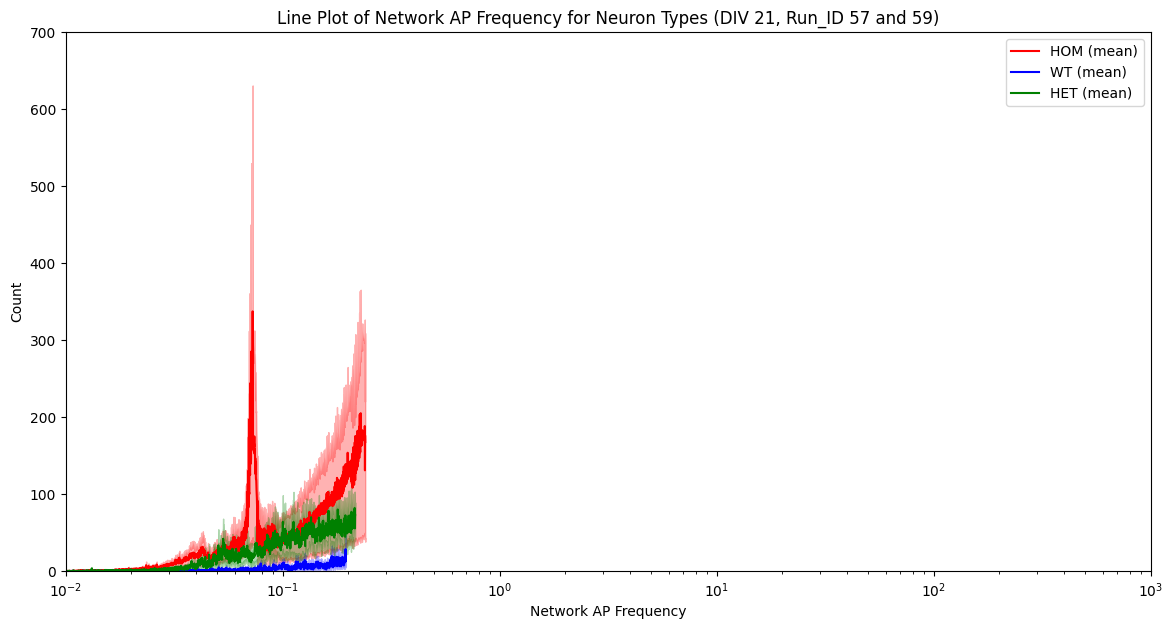

In [82]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Ensure all arrays are of the same length by truncating to the shortest length
min_length = min(len(bins) for bins in network_ap_freq_bins)
network_ap_freq_bins = [bins[:min_length] for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges[:min_length + 1] for edges in network_ap_freq_edges]  # edges have one more element than bins

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}

    plt.figure(figsize=(14, 7))
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]

        all_bins = []
        for i in indices:
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                all_bins.append(y)

        if all_bins:
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(len(all_bins))
            plt.plot(x, mean_bins, label=f'{neuron_type} (mean)', color=colors[neuron_type])
            plt.fill_between(x, mean_bins - sem_bins, mean_bins + sem_bins, alpha=0.3, color=colors[neuron_type])

    plt.xscale('log')
    plt.xlabel('Network AP Frequency')
    plt.ylabel('Count')
    plt.title(f'Line Plot of Network AP Frequency for Neuron Types (DIV 21, Run_ID 57 and 59)')
    plt.legend()
    plt.xlim(0.01, 1000)  # Extended x-axis range
    plt.ylim(0, 700)  # Keeping the y-axis limit large
    plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1970691611.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


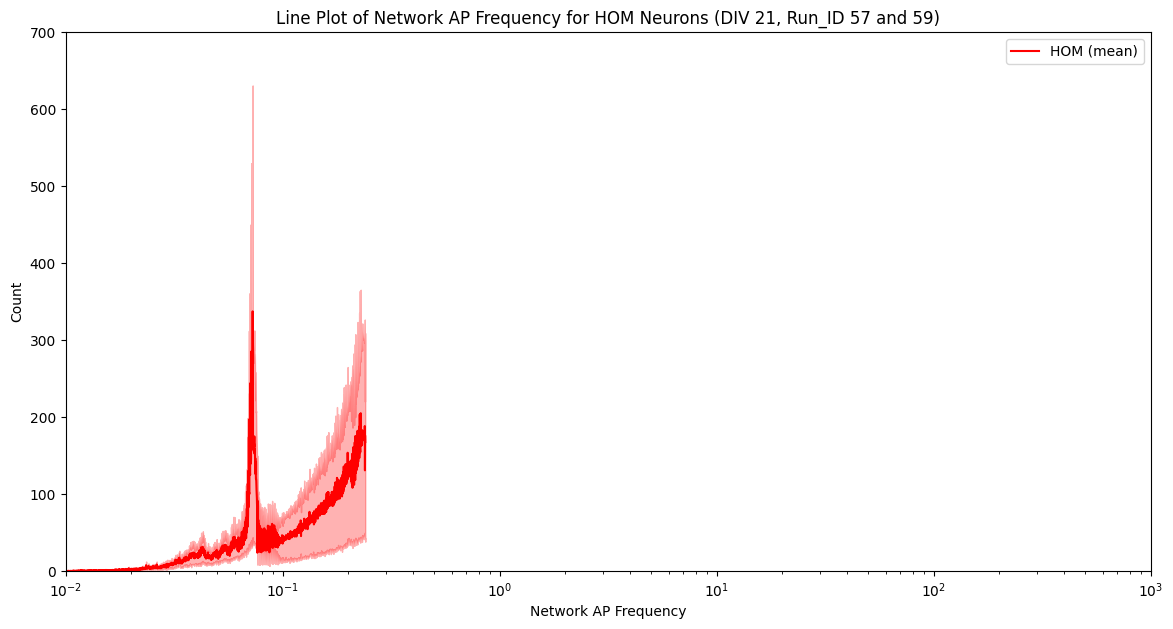

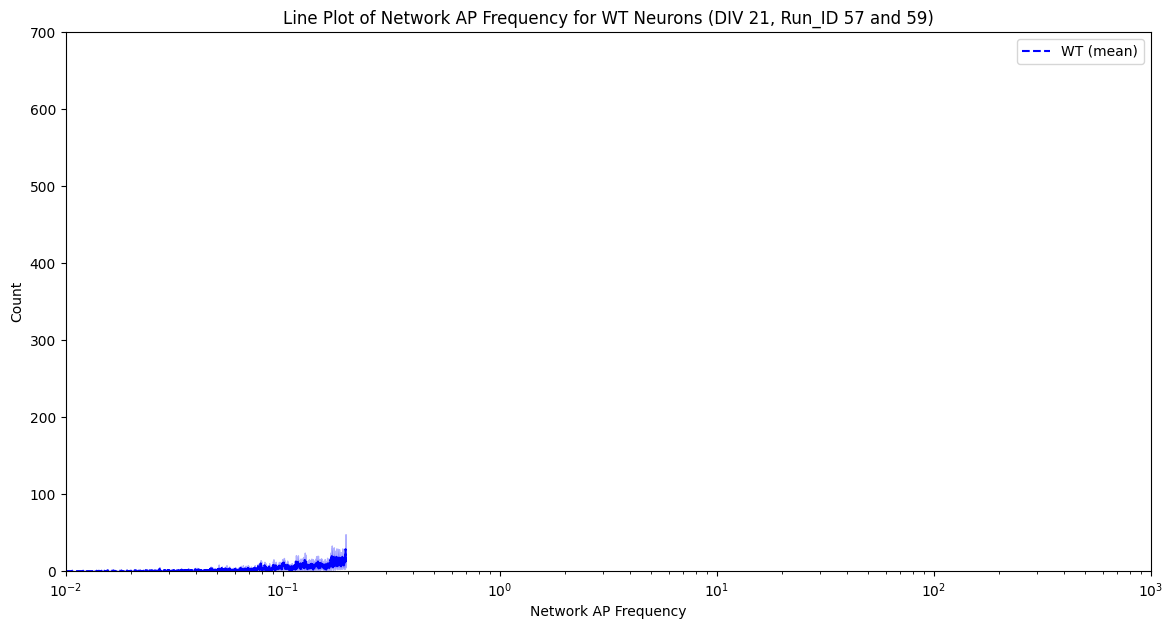

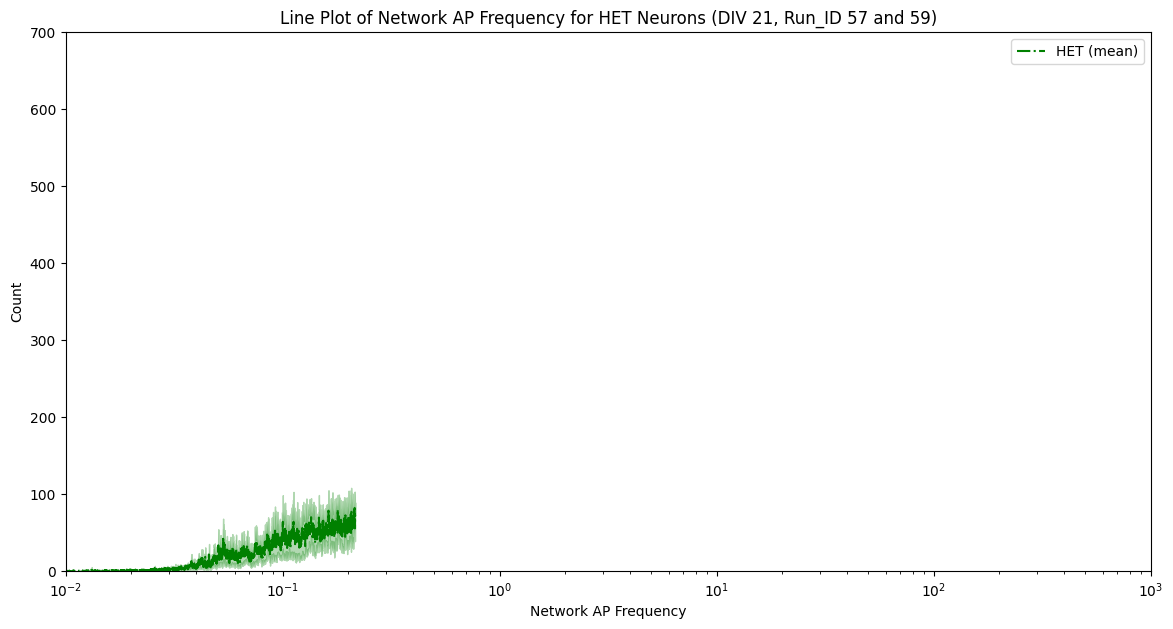

In [ ]:
#Same as above but trying to plot the normalization of the above 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1272185698.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


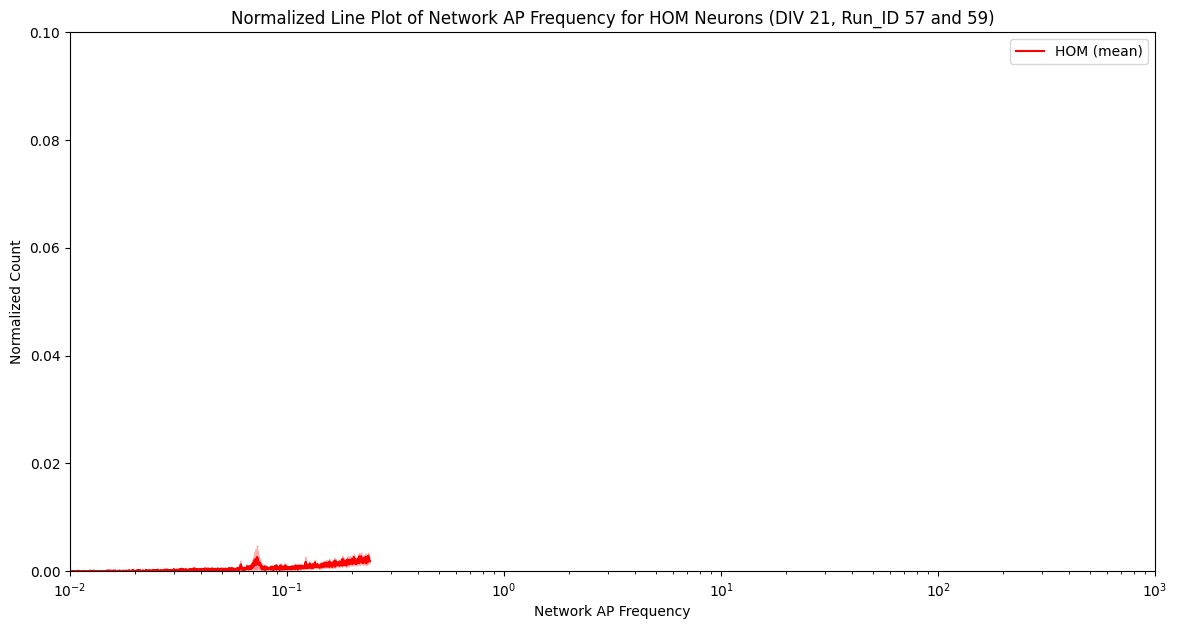

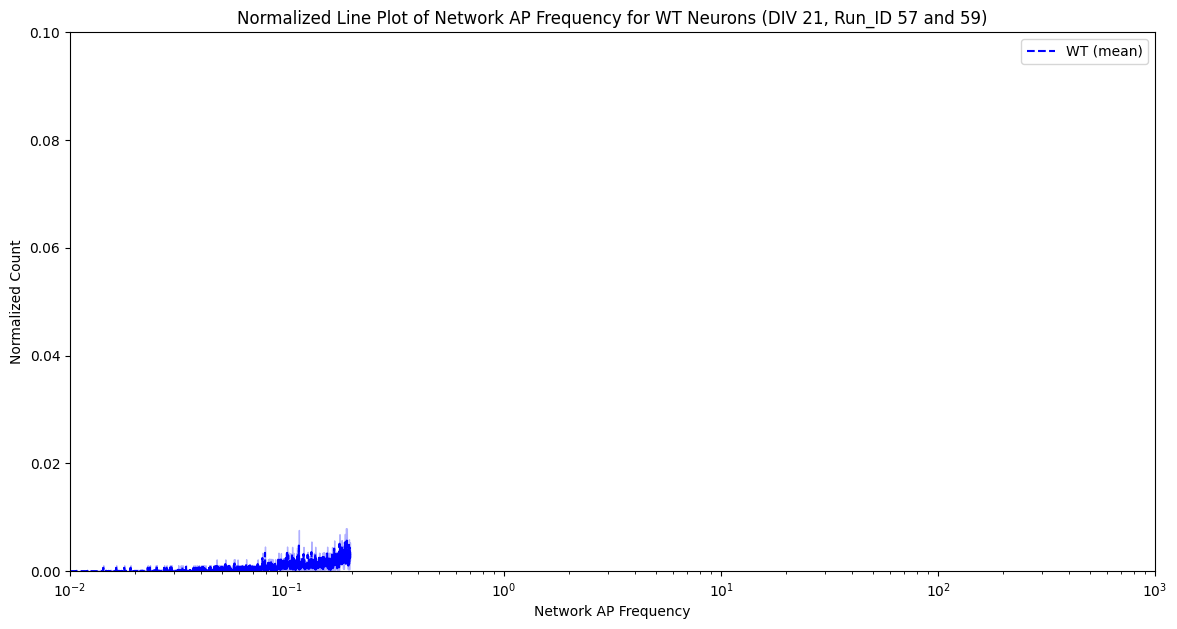

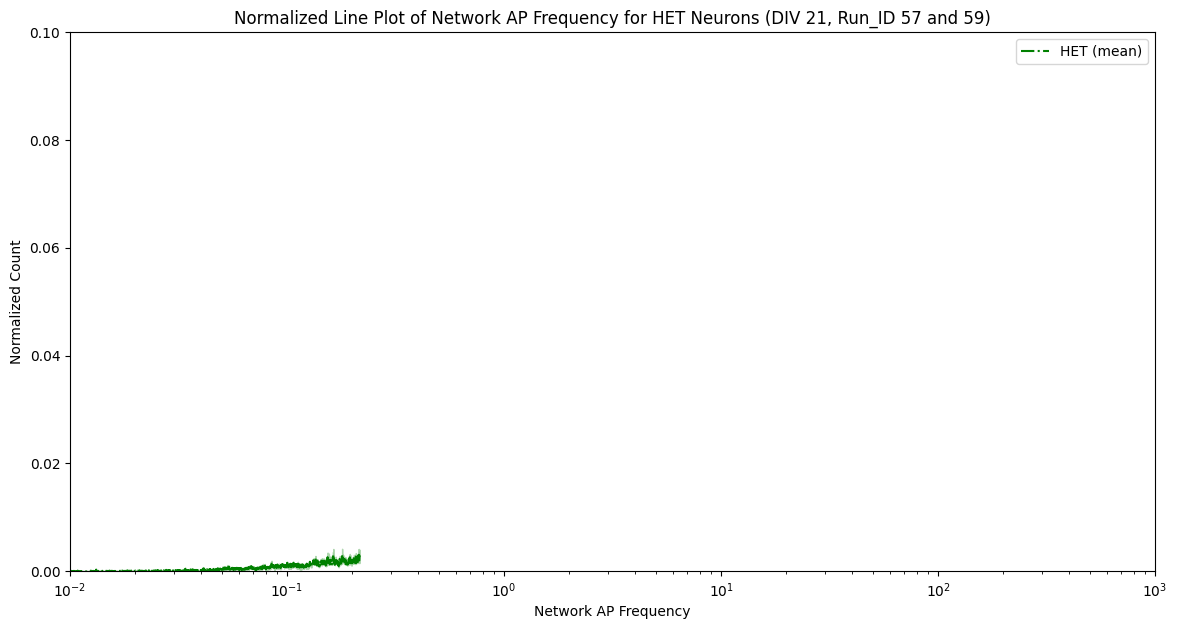

In [89]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # Taking DIV to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # Only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Ensure all arrays are of the same length by truncating to the shortest length
min_length = min(len(bins) for bins in network_ap_freq_bins)
network_ap_freq_bins = [bins[:min_length] for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges[:min_length + 1] for edges in network_ap_freq_edges]  # Edges have one more element than bins

# Normalize the bins by dividing each by the sum of its elements
network_ap_freq_bins = [bins / np.sum(bins) for bins in network_ap_freq_bins]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    styles = {'HOM': '-', 'WT': '--', 'HET': '-.'}

    for neuron_type in unique_neuron_types:
        plt.figure(figsize=(14, 7))
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]

        all_bins = []
        for i in indices:
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                all_bins.append(y)

        if all_bins:
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(len(all_bins))
            plt.plot(x, mean_bins, label=f'{neuron_type} (mean)', color=colors[neuron_type], linestyle=styles[neuron_type])
            plt.fill_between(x, mean_bins - sem_bins, mean_bins + sem_bins, alpha=0.3, color=colors[neuron_type])

        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for {neuron_type} Neurons (DIV 21, Run_ID 57 and 59)')
        plt.legend()
        plt.xlim(0.01, 1000)  # Extended x-axis range
        plt.ylim(0, 0.1)  # Adjust y-axis limit as needed
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [5]:
#LDA for the all the parameters excluding cov_BurstDuration, mean_Burst_Peak_Normalized, cov_Burst_Peak_Normalized, mean_Burst_Peak, cov_Burst_Peak, Time, Chip_ID, Well. And only for Run_ID=57 and 59

In [10]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.9 MB/s eta 0:00:00a 0:00:01


Index(['NeuronType', 'mean_IBI', 'cov_IBI', 'mean_Burst_Peak',
       'cov_Burst_Peak', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
       'Number_Bursts', 'mean_Spike_per_Burst', 'cov_Spike_per_Burst',
       'mean_BurstDuration', 'MeanNetworkISI', 'CoVNetworkISI',
       'MeanWithinBurstISI', 'CoVWithinBurstISI', 'MeanOutsideBurstISI',
       'CoVOutsideBurstISI', 'Fanofactor'],
      dtype='object')


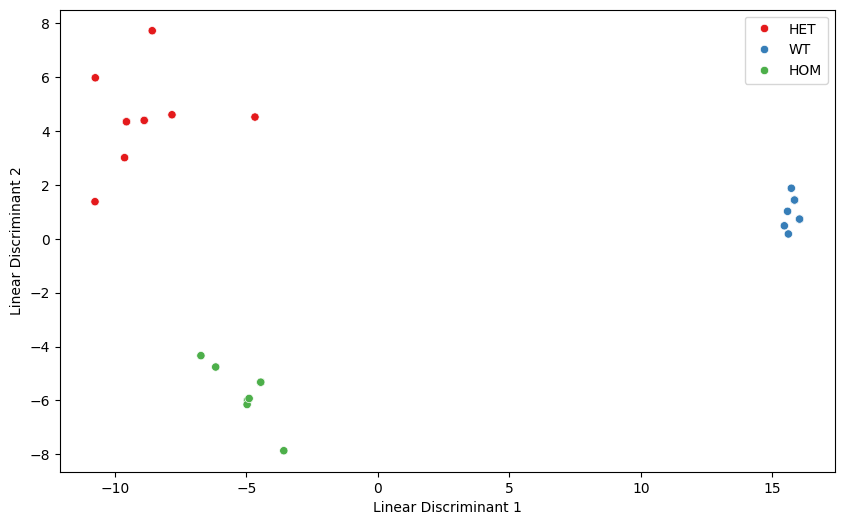

In [11]:
#Here two categorical var which is Run_ID and NeuronType
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57, 67])]

# Remove specified columns and drop rows with NaN values
columns_to_consider = ['NeuronType','mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI',
       'MeanWithinBurstISI', 'CoVWithinBurstISI', 'MeanOutsideBurstISI',
       'CoVOutsideBurstISI', 'Fanofactor']

filtered_df = df.loc[:, columns_to_consider]
filtered_df=filtered_df.dropna()
print(filtered_df.columns)



# Identify categorical variables
categorical_columns = ['NeuronType']

# Separate features and target variable
X = filtered_df.drop(columns=categorical_columns)
y = filtered_df['NeuronType']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
#lda_df = pd.DataFrame(X_lda)
lda_df['NeuronType'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='NeuronType', data=lda_df, palette='Set1')
#plt.title('LDA of NeuronType for Run_ID 59 and 57')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.show()


Index(['NeuronType', 'mean_IBI', 'cov_IBI', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'Number_Bursts', 'mean_Spike_per_Burst',
       'cov_Spike_per_Burst', 'mean_BurstDuration', 'MeanNetworkISI',
       'CoVNetworkISI', 'MeanWithinBurstISI', 'CoVWithinBurstISI',
       'MeanOutsideBurstISI', 'CoVOutsideBurstISI', 'Fanofactor'],
      dtype='object')
   NeuronType   mean_IBI     cov_IBI  mean_Burst_Peak_Abs  cov_Burst_Peak_Abs  \
1         HET   3.963514   66.593866          9840.191383           25.740220   
2          WT   5.462264   57.346418          5649.008747           38.744949   
3         HOM  12.700000   88.800452          6871.092566           11.205756   
4         HET   4.761290   48.830114          7515.934599           28.077634   
5          WT   4.960345   69.398508          5525.977804           43.732434   
31        HOM  94.333333  103.364465          5262.486792            3.893766   
32        HOM   7.638462   64.742255           493.205526            4

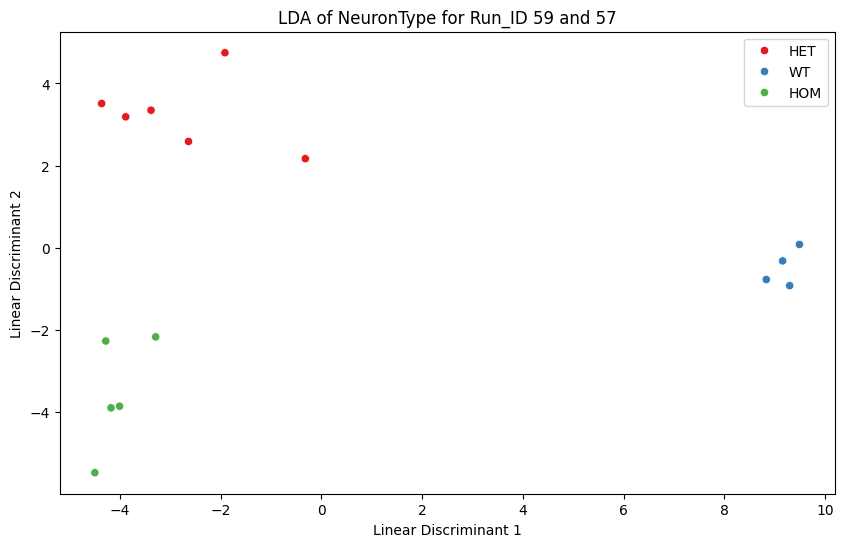

In [13]:
#categorical variable as Neurontype. Here the number of Discriminants = Number of classes - 1 (Here only 3 HET,HOM and WT ). Des features which is the rest of the columns not dropped vs targert variables (y) (Here the Neuron types)
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57, 67])]


# Remove specified columns
columns_to_remove = ['cov_BurstDuration', 'mean_Burst_Peak_Normalized', 'cov_Burst_Peak_Normalized',
                     'mean_Burst_Peak', 'cov_Burst_Peak', 'Time', 'Chip_ID', 'Well', 'Run_ID', 'DIV']
filtered_df = filtered_df.drop(columns=columns_to_remove)
print(filtered_df.columns)

# Drop rows with any NaN values
filtered_df = filtered_df.dropna()
print(filtered_df)

# Separate features and target variable, considering only 'NeuronType' as the categorical variable
X = filtered_df.drop(columns=['NeuronType'])
y = filtered_df['NeuronType']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['NeuronType'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='NeuronType', data=lda_df, palette='Set1')
plt.title('LDA of NeuronType for Run_ID 59 and 57')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.show()


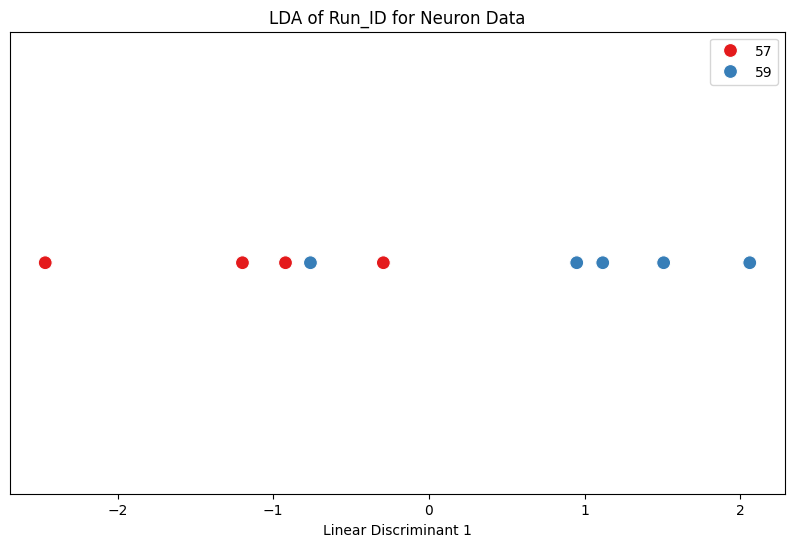

In [14]:
#categorical value as Run_ID. Here the number of Discriminants = Number of classes - 1 (Here only two classes which is 57 and 59 ). Hence the reason for the one dimension or the straight line
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57])]

# Remove specified columns
columns_to_remove = ['cov_BurstDuration', 'mean_Burst_Peak_Normalized', 'cov_Burst_Peak_Normalized',
                     'mean_Burst_Peak', 'cov_Burst_Peak', 'Time', 'Chip_ID', 'Well']
filtered_df = filtered_df.drop(columns=columns_to_remove)

# Drop rows with any NaN values
filtered_df = filtered_df.dropna()

# Separate features and target variable, considering only 'Run_ID' as the categorical variable
X = filtered_df.drop(columns=['Run_ID', 'NeuronType'])
y = filtered_df['Run_ID']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['Run_ID'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y=[0]*len(lda_df), hue='Run_ID', data=lda_df, palette='Set1', s=100, edgecolor='w')
plt.title('LDA of Run_ID for Neuron Data')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])  # Remove y-axis ticks since all values are 0
plt.legend(loc='best')
plt.show()
